# advanced Exploratory Data Analysis
## Corporate Tax Cut Project

In [1]:
import pandas as pd
import missingno as mn
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [20, 10]

### Transferred "CEO Pay and Employment Data at Tax-Dodging Corporations" table from Appendix 1 from Report A into `ips_appendix1`

In [2]:
ips_appendix1 = pd.read_csv('csv/report_data/ips_appendix1.csv')
ips_appendix1.columns = ['Company Name', 'Profit ($mil 2008-2015)', 'Fed Tax Paid ($mil 2008-2015)', 'Effective Tax Rate (% 2008-2015)','Employee count (# end of 2016)', 'Difference in employee count (# 2008-2016)','Adjusted percent change in employees (% 2008-2016)', 'CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']
ips_appendix1.index = ips_appendix1['Company Name']
ips_appendix1.drop(ips_appendix1.columns[0], axis = 1, inplace=True)
ips_appendix1.head()

,Profit ($mil 2008-2015),Fed Tax Paid ($mil 2008-2015),Effective Tax Rate (% 2008-2015),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
Company Name,,,,,,,,
AT&T,141624,11500,8.1,268000,-79450,-23,28433716,146
Verizon,81518,7401,9.1,160900,-78450,-33,17674579,-5
ExxonMobil,60482,8227,13.6,72700,-37735,-34,27393567,22
United Technologies,24421,2546,10.4,201600,-37000,-16,15831335,-12
JPMorgan Chase,114770,17956,15.6,243000,-26961,-10,27236892,39


### Transferred "Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 (alphabetical)" table from Report B into `itep_tax_rates`

In [3]:
itep_tax_rates = pd.read_csv('csv/report_data/itep_tax_rates.csv', na_values=['NaN'])
itep_tax_rates.columns= ['Company Name', 'Profit ($mil Eight Year Total)', 'Tax ($mil Eight Year Total)',
       'Rate (% Eight Year Total)', 'Profit ($mil 2015)', 'Tax ($mil 2015)', 'Rate (% 2015)',
       'Profit ($mil 2014)', 'Tax ($mil 2014)', 'Rate (% 2014)', 'Profit ($mil 2013)',
       'Tax ($mil 2013)', 'Rate (% 2013)', 'Profit ($mil 2008-12)', 'Tax ($mil 2008-12)',
       'Rate (% 2008-12)']
itep_tax_rates.index = itep_tax_rates['Company Name']
itep_tax_rates.drop(itep_tax_rates.columns[0], axis = 1, inplace=True)
itep_tax_rates.head()

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12)
Company Name,,,,,,,,,,,,,,,
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6
Aetna,22564.1,7290.8,32.3,4133.0,1753.1,42.4,3423.0,1198.8,35.0,2899.2,832.9,28.7,12108.8,3505.9,29.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6


### Transferred "U.S. Profits & U.S. Federal Income Taxes versus Foreign Profits & Foreign Income Taxes, 2008-15 for companies with foreign pretax profits at least 10% of total worldwide pretax profits, \$-million" table from Report B into `itep_foreign`

In [4]:
itep_foreign = pd.read_csv('csv/report_data/itep_foreign.csv')
itep_foreign.columns = ['Company Name', 'US profit', 'US tax', 'US rate', 'Foreign profit', 'Foreign tax',
                          'Foreign rate', 'US rate - Foreign rate']
itep_foreign.index = itep_foreign['Company Name']
itep_foreign.drop(itep_foreign.columns[0], axis = 1, inplace=True)
itep_foreign.head()

,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
Company Name,,,,,,,
Wal-Mart Stores,145059,48796,33.6,42692,11562,27.1,6.6
General Electric,40375,-1051,-2.6,85495,27726,32.4,-35.0
J.P. Morgan Chase & Co.,121544,24731,20.3,59592,12935,21.7,-1.4
McKesson,11973,2766,23.1,4811,576,12.0,11.1
International Business Machines,66753,6874,10.3,86183,21639,25.1,-14.8


### Transferred "3 Effective Federal Corporate Income Tax Rates on 258 Major Corporations, 2008–2015 by Industry" table from Report B into `itep_corp_indust`

In [5]:
itep_corp_indust = pd.read_csv('csv/report_data/itep_corp_indust.csv')
itep_corp_indust.columns = ['Company Name', 'Industry']
itep_corp_indust.index = itep_corp_indust['Company Name']
itep_corp_indust.drop(itep_corp_indust.columns[0], axis = 1, inplace=True)
itep_corp_indust.head()

,Industry
Company Name,
Boeing,Aerospace & defense
United Technologies,Aerospace & defense
Rockwell Collins,Aerospace & defense
L-3 Communications,Aerospace & defense
Raytheon,Aerospace & defense


### Transferred industry categorization data from "100 Companies Paying Zero Tax or Less in at Least One Year, 2008–2015" table from Report B into `itep_zero_tax`

In [6]:
itep_zero_tax = pd.read_csv('csv/report_data/itep_zero_tax.csv')
itep_zero_tax.columns = ['Company Name', 'Years with zero tax or less']
itep_zero_tax.index = itep_zero_tax['Company Name']
itep_zero_tax.drop(itep_zero_tax.columns[0], axis = 1, inplace=True)
itep_zero_tax.head()

,Years with zero tax or less
Company Name,
PG&E Corp.,8
AGL Resources,2
Pepco Holdings,7
Constellation Brands,2
Wisconsin Energy,7


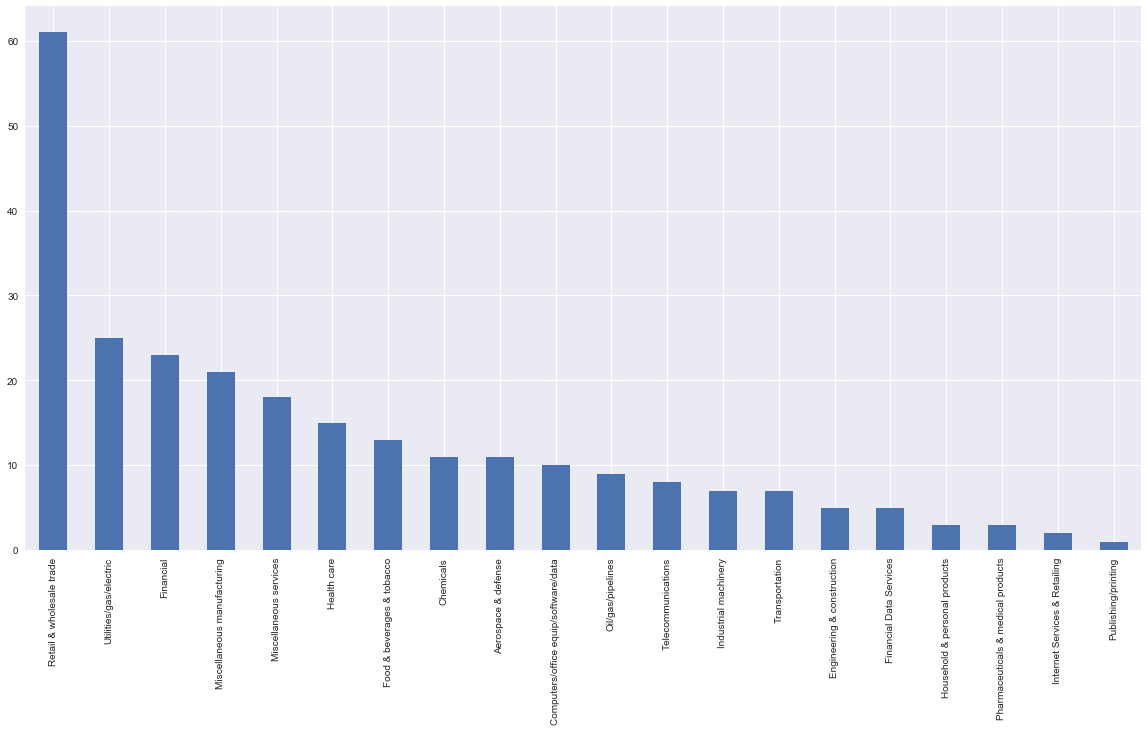

In [7]:
itep_corp_indust['Industry'].value_counts().plot(kind='bar')

### Transferred industry categorization data from "Company-By-Company Notes" from Report B into `itep_notes`

In [8]:
itep_notes = pd.read_csv('csv/report_data/itep_notes.csv')
itep_notes.columns = ['Company Name', 'Note']
itep_notes.index = itep_notes['Company Name']
itep_notes.drop(itep_notes.columns[0], axis = 1, inplace=True)
itep_notes.head()

,Note
Company Name,
3M,The high tax rate in 2008 reflects a turnaroun...
ABM Industries,The company's fiscal years end in October of t...
Advance Auto Parts,Deferred taxes explain most of the company's s...
Aetna,The company's high tax rates in 2015 and 2014 ...
AGL Resources,The low tax rates in most years are explained ...


## Creating one table containing all data for each company:

### Current tables:
- `ips_appendix1`
- `itep_tax_rates`
- `itep_foreign`
- `itep_corp_indust`
- `itep_zero_tax`
- `itep_notes`

### All companies:
- Profit
- Tax
- Rate (US)
- Industry
- Note

### Some companies:
- Employee Change %
- CEO compensation change %
- Rate (Foreign)

#### Creating new `master_table`

In [9]:
master_table = itep_tax_rates.copy()

#### Merging `ips_appendix1` with `master_table`

In [10]:
ips_appendix1.index.difference(master_table.index)

Index(['21st Century Fox', 'Commty Health Systems', 'ExxonMobil', 'IBM',
       'JPMorgan Chase', 'PNC Financial Services', 'Public Service Enterprise',
       'Reinsurance Grp of Amer', 'Travelers', 'Verizon', 'WEC',
       'Wyndham Worldwide'],
      dtype='object', name='Company Name')

In [11]:
ips_appendix1.rename({'21st Century Fox': 'Twenty-First Century Fox',
                       'Commty Health Systems': 'Community Health Systems',
                       'ExxonMobil': 'Exxon Mobil',
                        'JPMorgan Chase': 'J.P. Morgan Chase & Co.',
                        'PNC Financial Services': 'PNC Financial Services Group',
                        'Public Service Enterprise': 'Public Service Enterprise Group',
                        'Reinsurance Grp of Amer': 'Reinsurance Group of America',
                        'Travelers': 'Travelers Cos.',
                        'Verizon': 'Verizon Communications'}, inplace=True)

master_table.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)

master_table = pd.concat([master_table, ips_appendix1[['Employee count (# end of 2016)','Difference in employee count (# 2008-2016)','Adjusted percent change in employees (% 2008-2016)','CEO compensation ($ 2016)', 'CEO compensation % change (2008-2016)']]], axis=1)

In [12]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),Tax ($mil 2013),Rate (% 2013),Profit ($mil 2008-12),Tax ($mil 2008-12),Rate (% 2008-12),Employee count (# end of 2016),Difference in employee count (# 2008-2016),Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016)
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,871.9,28.0,12589.9,2813.1,22.3,NaN,NaN,NaN,NaN,NaN
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,15.3,15.7,431.0,35.0,8.1,110000.0,-2500.0,-2.0,3837985.0,37.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,166.0,35.4,1781.2,11.2,0.6,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,3043.0,15.8,86087.7,4352.4,5.1,268000.0,-79450.0,-23.0,28433716.0,146.0
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,189.3,33.3,2528.7,671.4,26.6,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_foreign` with `master_table`

In [13]:
itep_foreign.index.difference(master_table.index)

Index(['Gamestop', 'International Business Machines',
       'Wyndham Worldwide Corporation'],
      dtype='object')

In [14]:
itep_foreign.rename({'Gamestop': 'GameStop',
                       'International Business Machines': 'IBM',
                       'Wyndham Worldwide Corporation': 'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_foreign], axis=1)

In [15]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,Adjusted percent change in employees (% 2008-2016),CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,-2.0,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,-23.0,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Merging `itep_corp_indust` with `master_table`

In [16]:
itep_corp_indust.index.difference(master_table.index)

Index(['International Business Machines', 'Wisconsin Energy',
       'Wyndham Worldwide Corporation'],
      dtype='object')

In [17]:
itep_corp_indust.rename({'International Business Machines': 'IBM',
                     'Wisconsin Energy': 'WEC',
                     'Wyndham Worldwide Corporation':'Wyndham Worldwide'}, inplace=True)
master_table = pd.concat([master_table, itep_corp_indust], axis=1)

In [18]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,CEO compensation ($ 2016),CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,3837985.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,28433716.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade


#### Merging `itep_zero_tax` with `master_table`

In [19]:
itep_zero_tax.index.difference(master_table.index)

Index(['Group1 Automotive', 'International Business Machines',
       'Wisconsin Energy'],
      dtype='object')

In [20]:
itep_zero_tax.rename({'Group1 Automotive': 'Group 1 Automotive',
                     'International Business Machines': 'IBM',
                     'Wisconsin Energy':'WEC'}, inplace=True)
master_table = pd.concat([master_table, itep_zero_tax], axis=1)
master_table['Years with zero tax or less'].fillna(0, inplace=True)

In [21]:
print(len(master_table))
master_table.head()

258


,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,CEO compensation % change (2008-2016),US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,NaN,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing,0.0
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services,1.0
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,2.0
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications,1.0
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade,0.0


#### Merging `itep_notes` with `master_table`

In [22]:
itep_notes.index.difference(master_table.index)

Index(['Air Products and Chemicals', 'Amazon', 'Anthem',
       'Asbury Automotive Group', 'Autonation', 'Autozone', 'BB&T',
       'C.H. Robinson', 'Capital One', 'Coach', 'Discovery Communications',
       'Dish Network', 'Dupont', 'First Energy', 'Gamestop',
       'International Business Machines (IBM)', 'Interpublic', 'LKQ Corp',
       'Mastercard', 'McDonalds', 'PG&E Corp', 'Pepsico', 'Spartan Nash',
       'State Street', 'Unum', 'WEC Energy Group', 'Wal-Mart', 'Walgreens'],
      dtype='object')

In [23]:
itep_notes.rename({'Air Products and Chemicals': 'Air Products & Chemicals',
                   'Amazon': 'Amazon.com',
                   'Asbury Automotive Group': 'Asbury Automotive Group Inc.',
                   'Autonation': 'AutoNation',
                   'Autozone': 'AutoZone',
                   'BB&T': 'BB&T Corp.',
                   'C.H. Robinson': 'C.H. Robinson Worldwide',
                   'Capital One': 'Capital One Financial',
                   'Coach': 'Coach Inc.',
                   'Discovery Communications': 'Discovery Communications Inc.',
                   'Dupont': 'DuPont',
                   'First Energy': 'FirstEnergy',
                   'Gamestop': 'GameStop',
                   'International Business Machines (IBM)': 'IBM',
                   'Interpublic': 'Interpublic Group',
                   'LKQ Corp': 'LKQ Corporation',
                   'Mastercard': 'MasterCard',
                   'McDonalds': 'McDonald\'s',
                   'PG&E Corp': 'PG&E Corp.',
                   'Pepsico': 'PepsiCo',
                   'Spartan Nash': 'SpartanNash',
                   'State Street': 'State Street Corp.',
                   'Unum': 'Unum Group',
                   'WEC Energy Group': 'WEC',
                   'Wal-Mart': 'Wal-Mart Stores'}, inplace=True)

master_table.rename({'WellPoint': 'Anthem',
                     'DISH Network': 'Dish Network',
                     'Walgreen':'Walgreens'}, inplace=True)

master_table = pd.concat([master_table, itep_notes], axis=1)

In [24]:
master_table

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less,Note
3M,23794.4,5860.6,24.6,4349.7,1210.6,27.8,3735.9,964.9,25.8,3118.9,...,24214.0,6280.0,25.9,24123.0,6456.0,26.8,-0.8,Miscellaneous manufacturing,0.0,The high tax rate in 2008 reflects a turnaroun...
ABM Industries,696.0,84.2,12.1,57.2,1.8,3.1,110.1,32.0,29.1,97.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Miscellaneous services,1.0,The company's fiscal years end in October of t...
AGL Resources,3680.2,279.2,7.6,556.0,-11.0,-2.0,874.0,113.0,12.9,469.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,2.0,The low tax rates in most years are explained ...
AT&T,141623.7,11500.4,8.1,18953.0,2496.0,13.2,17311.4,1609.0,9.3,19271.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Telecommunications,1.0,The company reports noncontrolling interest in...
Advance Auto Parts,4471.8,1288.8,28.8,670.6,232.0,34.6,703.9,196.1,27.9,568.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade,0.0,Deferred taxes explain most of the company's s...
Aetna,22564.1,7290.8,32.3,4133.0,1753.1,42.4,3423.0,1198.8,35.0,2899.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Health care,0.0,The company's high tax rates in 2015 and 2014 ...
Air Products & Chemicals,4117.4,439.5,10.7,727.7,149.7,20.6,548.0,-6.2,-1.1,428.5,...,4186.0,508.0,12.1,5770.0,1431.0,24.8,-12.7,Chemicals,2.0,The company's fiscal year ends in September of...
Airgas,3689.3,800.8,21.7,514.0,137.4,26.7,557.5,150.5,27.0,522.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retail & wholesale trade,0.0,The company's fiscal years end in March follow...
Alleghany Corporation,3297.4,702.2,21.3,373.6,93.3,25.0,628.9,115.4,18.3,611.4,...,3270.0,724.0,22.1,918.0,232.0,25.3,-3.2,Financial,0.0,Reported pretax profits in 2008 were adjusted ...
Alliance Data Systems,3299.6,892.5,27.0,784.1,305.6,39.0,691.6,196.4,28.4,533.5,...,3441.0,1034.0,30.1,1513.0,473.0,31.3,-1.2,Financial Data Services,1.0,The high tax rate in 2015 reflects an increase...


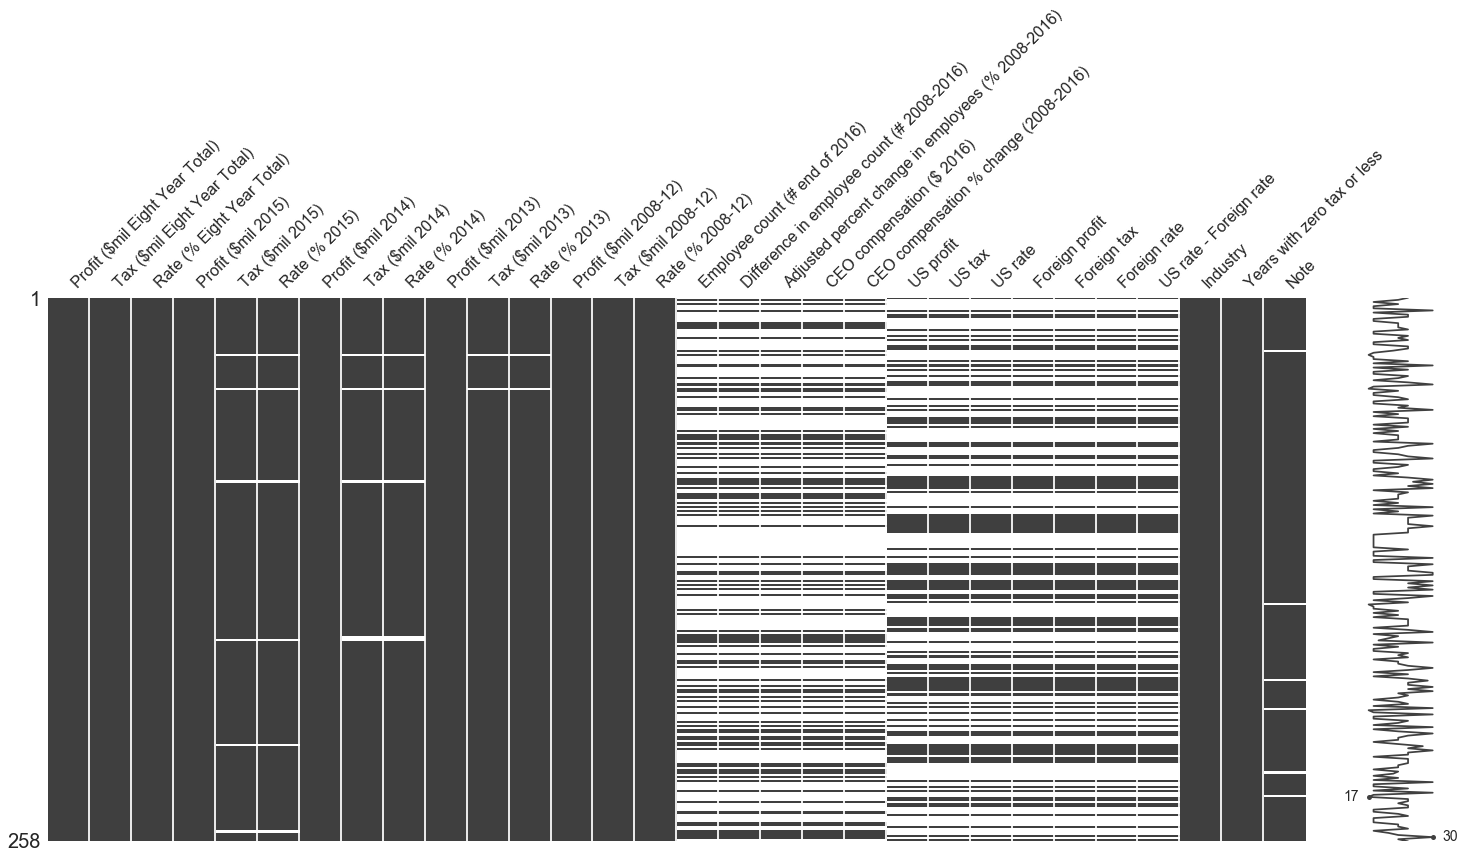

In [25]:
mn.matrix(master_table)

In [26]:
master_table[pd.isnull(master_table['Tax ($mil 2015)'])]

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less,Note
Atmos Energy,2826.3,-114.2,-4.0,503.5,NaN,NaN,471.3,NaN,NaN,365.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,6.0,The company's fiscal years end in September of...
CMS Energy,4666.0,-26.0,-0.6,772.0,NaN,NaN,703.0,NaN,NaN,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,5.0,Accelerated depreciation saved the company sub...
Duke Energy,19767.5,-422.0,-2.1,3840.0,NaN,NaN,3544.0,NaN,NaN,3357.0,...,19889.0,-300.0,-1.5,4021.0,980.0,24.4,-25.9,Utilities/gas/electric,7.0,The company's results for 2012 were adjusted t...
NiSource,4399.1,-352.2,-8.0,333.9,NaN,NaN,829.8,NaN,NaN,762.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,7.0,Accelerated depreciation saved the company sub...
Spectra Energy,6511.0,455.0,7.0,359.0,NaN,NaN,904.0,1.0,0.1,934.0,...,6587.0,531.0,8.1,4239.0,489.0,11.5,-3.5,Oil/gas/pipelines,2.0,The company reports noncontrolling interest in...
Williams,8943.9,516.0,5.8,86.7,NaN,NaN,3267.0,-9.0,-0.3,721.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oil/gas/pipelines,3.0,The company reports noncontrolling interest in...


Notes:
- All the NaNs for `Tax ($mil 2015)` are energy companies

In [27]:
master_table[pd.isnull(master_table['Tax ($mil 2014)'])]

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less,Note
Atmos Energy,2826.3,-114.2,-4.0,503.5,NaN,NaN,471.3,NaN,NaN,365.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,6.0,The company's fiscal years end in September of...
CMS Energy,4666.0,-26.0,-0.6,772.0,NaN,NaN,703.0,NaN,NaN,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,5.0,Accelerated depreciation saved the company sub...
Duke Energy,19767.5,-422.0,-2.1,3840.0,NaN,NaN,3544.0,NaN,NaN,3357.0,...,19889.0,-300.0,-1.5,4021.0,980.0,24.4,-25.9,Utilities/gas/electric,7.0,The company's results for 2012 were adjusted t...
NextEra Energy,21518.0,-313.0,-1.5,3959.0,10.0,0.3,3674.0,NaN,NaN,2452.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,6.0,Deferred tax benefits explain most of the comp...
NiSource,4399.1,-352.2,-8.0,333.9,NaN,NaN,829.8,NaN,NaN,762.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,7.0,Accelerated depreciation saved the company sub...


Notes:
- Again all companies that have NaNs for `Tax ($mil 2014)` are energy companies

In [28]:
master_table[pd.isnull(master_table['Tax ($mil 2013)'])]

,Profit ($mil Eight Year Total),Tax ($mil Eight Year Total),Rate (% Eight Year Total),Profit ($mil 2015),Tax ($mil 2015),Rate (% 2015),Profit ($mil 2014),Tax ($mil 2014),Rate (% 2014),Profit ($mil 2013),...,US profit,US tax,US rate,Foreign profit,Foreign tax,Foreign rate,US rate - Foreign rate,Industry,Years with zero tax or less,Note
Atmos Energy,2826.3,-114.2,-4.0,503.5,NaN,NaN,471.3,NaN,NaN,365.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,6.0,The company's fiscal years end in September of...
CMS Energy,4666.0,-26.0,-0.6,772.0,NaN,NaN,703.0,NaN,NaN,720.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Utilities/gas/electric,5.0,Accelerated depreciation saved the company sub...


Notes:
- All companies that have NaNs for `Tax ($mil 2013)` are energy companies

# Question-based EDA

In [29]:
master_table.columns.tolist()

['Profit ($mil Eight Year Total)',
 'Tax ($mil Eight Year Total)',
 'Rate (% Eight Year Total)',
 'Profit ($mil 2015)',
 'Tax ($mil 2015)',
 'Rate (% 2015)',
 'Profit ($mil 2014)',
 'Tax ($mil 2014)',
 'Rate (% 2014)',
 'Profit ($mil 2013)',
 'Tax ($mil 2013)',
 'Rate (% 2013)',
 'Profit ($mil 2008-12)',
 'Tax ($mil 2008-12)',
 'Rate (% 2008-12)',
 'Employee count (# end of 2016)',
 'Difference in employee count (# 2008-2016)',
 'Adjusted percent change in employees (% 2008-2016)',
 'CEO compensation ($ 2016)',
 'CEO compensation % change (2008-2016)',
 'US profit',
 'US tax',
 'US rate',
 'Foreign profit',
 'Foreign tax',
 'Foreign rate',
 'US rate - Foreign rate',
 'Industry',
 'Years with zero tax or less',
 'Note']

### How do different industries compare w.r.t:
- US federal tax rate
- CEO compensation
- Employee change
- Foreign tax rate

#### US federal tax rate comparison

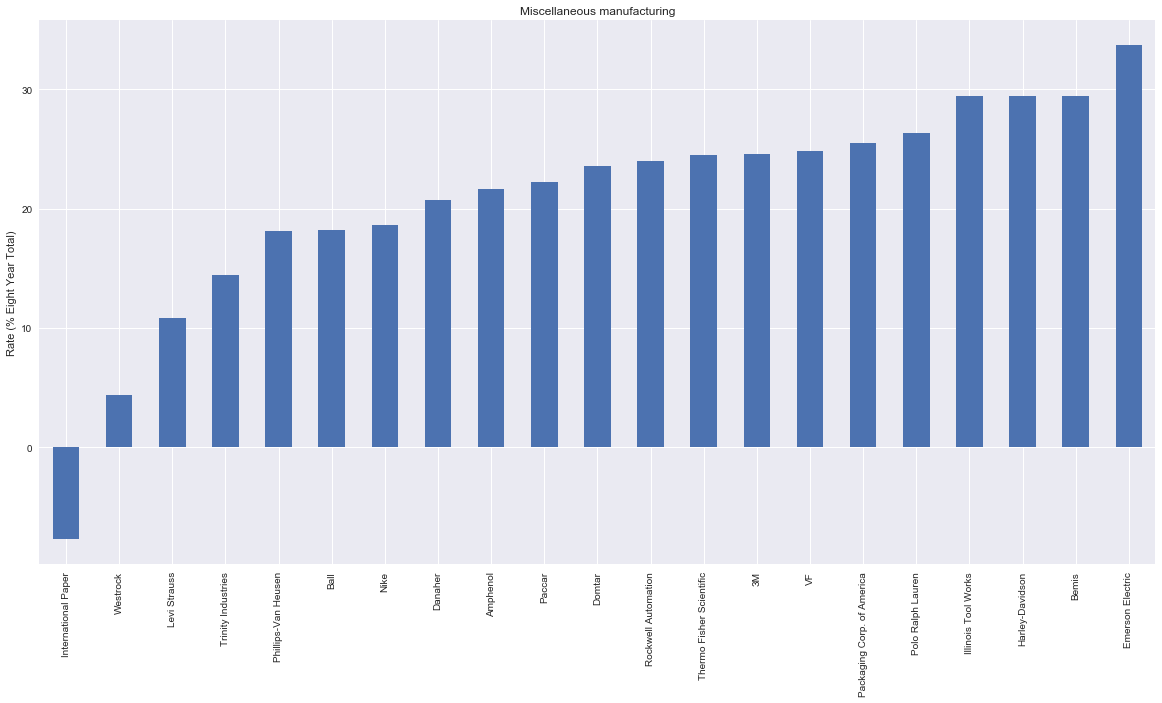

Effective Federal Tax Rate: 23.1 %


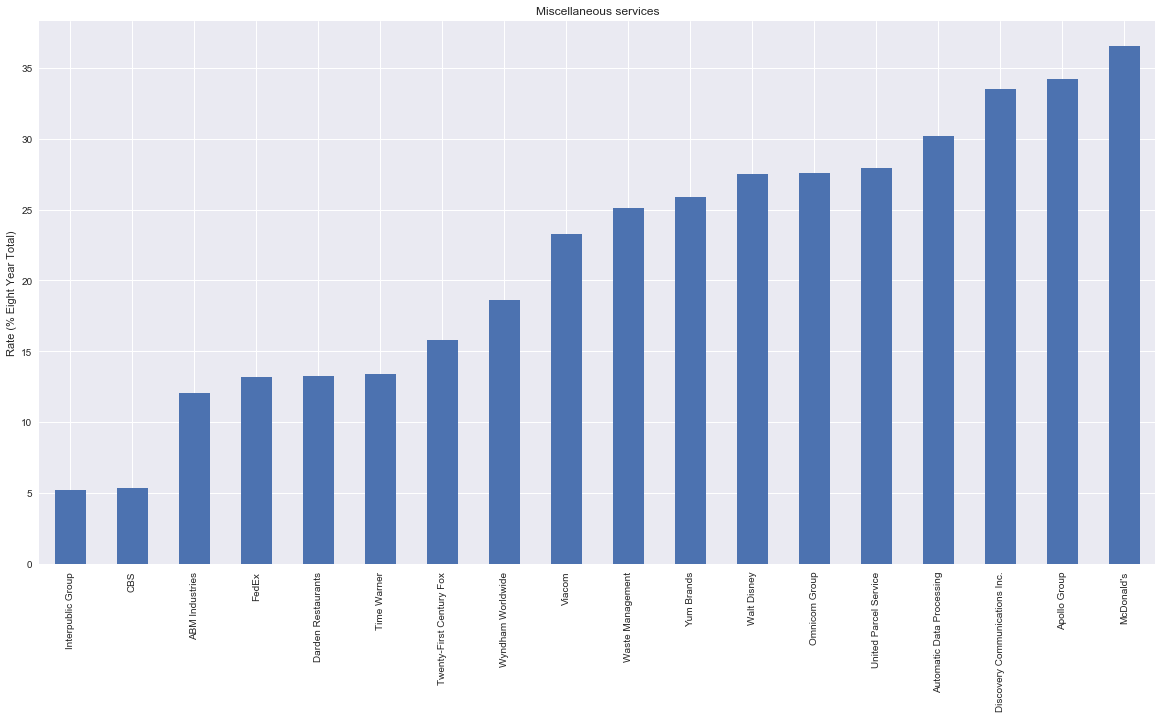

Effective Federal Tax Rate: 22.9 %


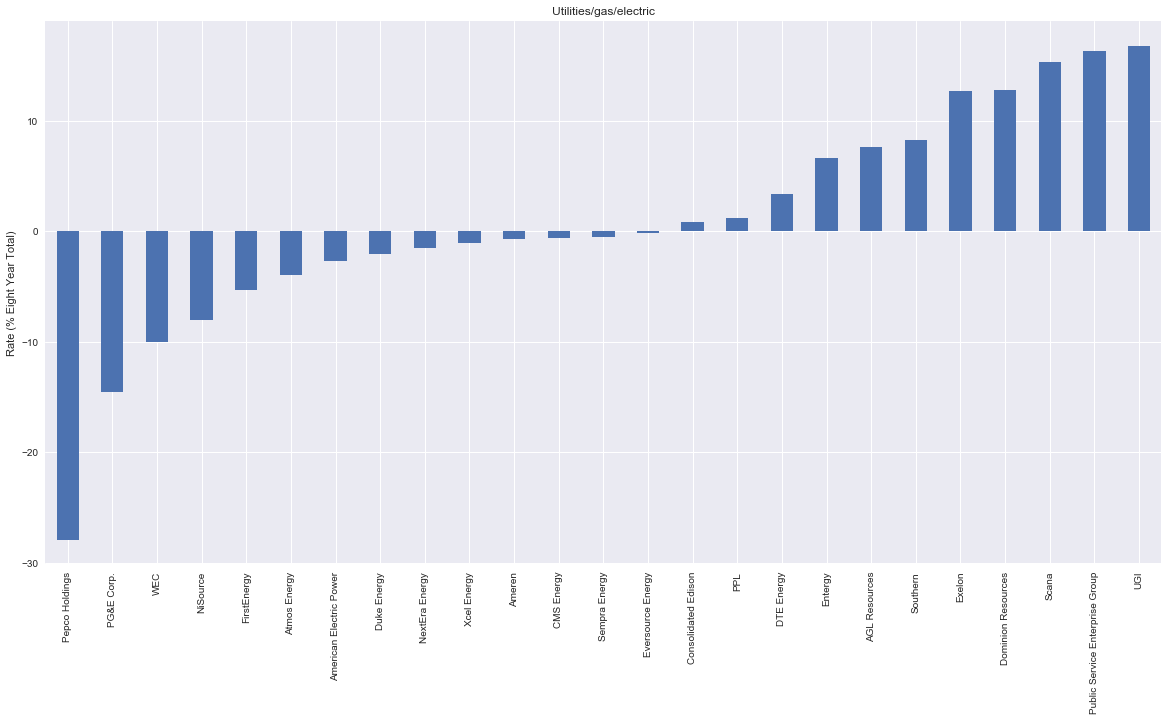

Effective Federal Tax Rate: 3.1 %


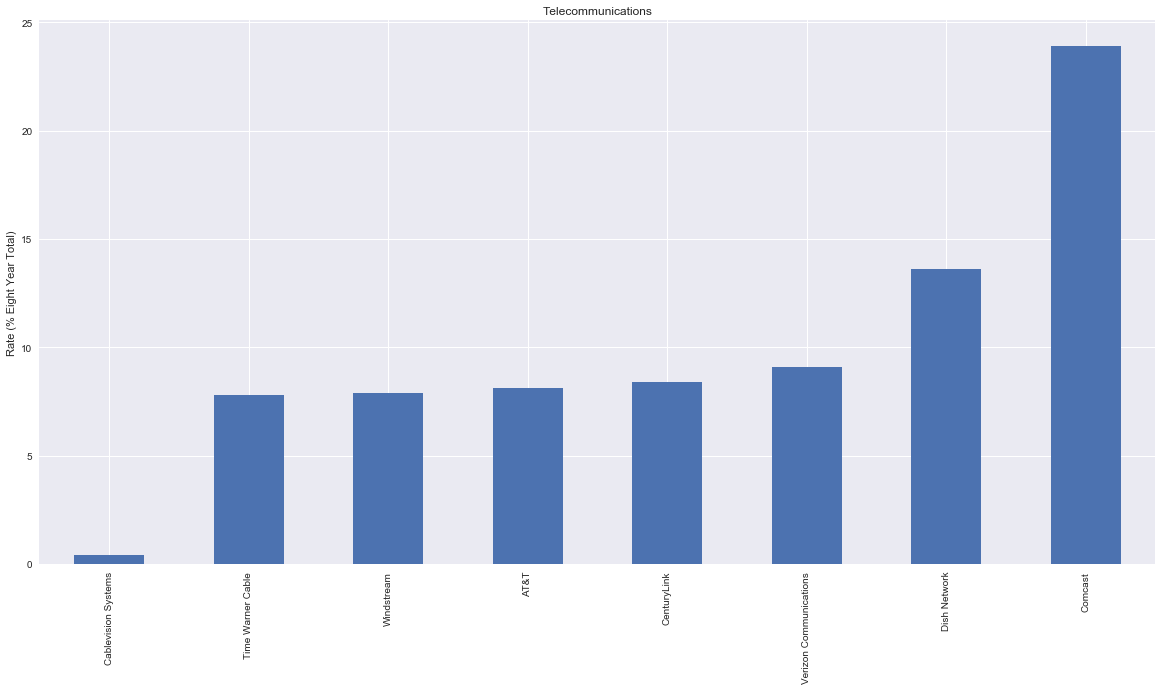

Effective Federal Tax Rate: 11.5 %


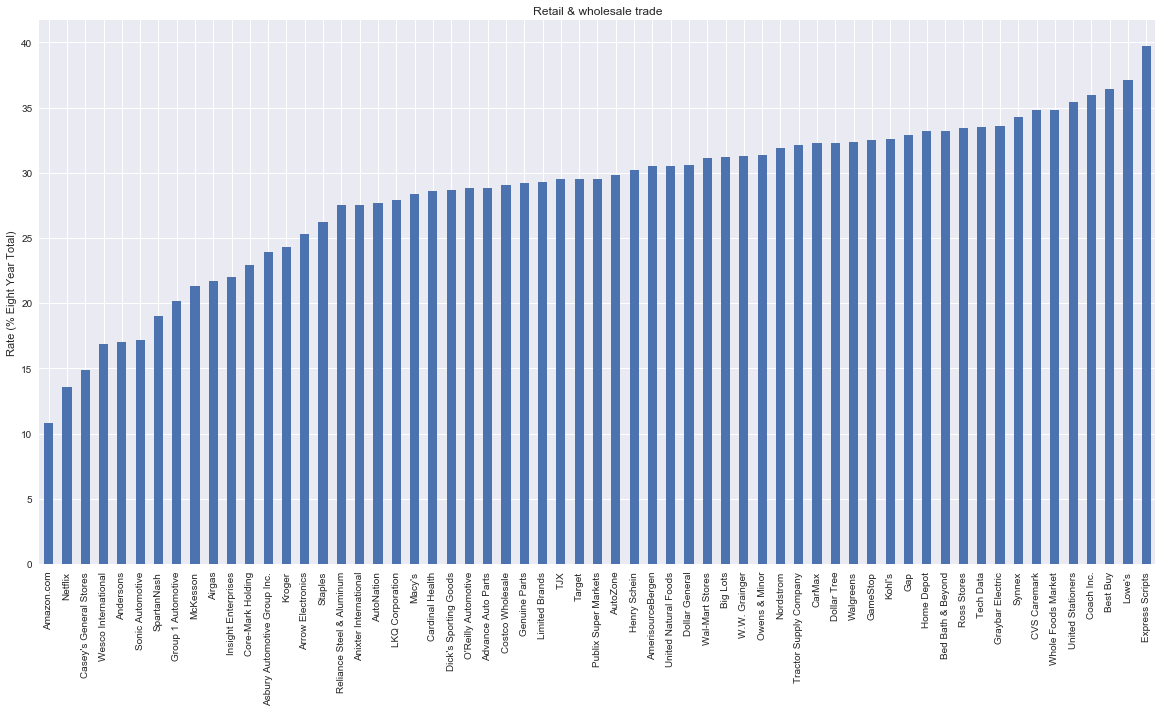

Effective Federal Tax Rate: 31.0 %


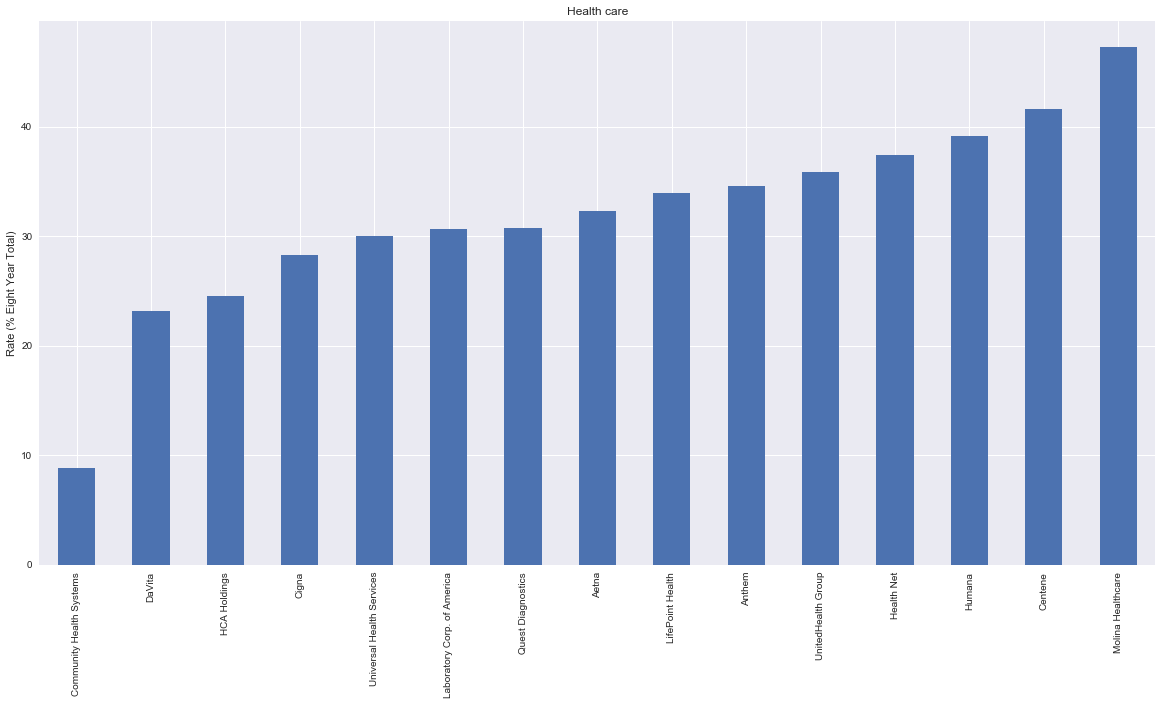

Effective Federal Tax Rate: 32.7 %


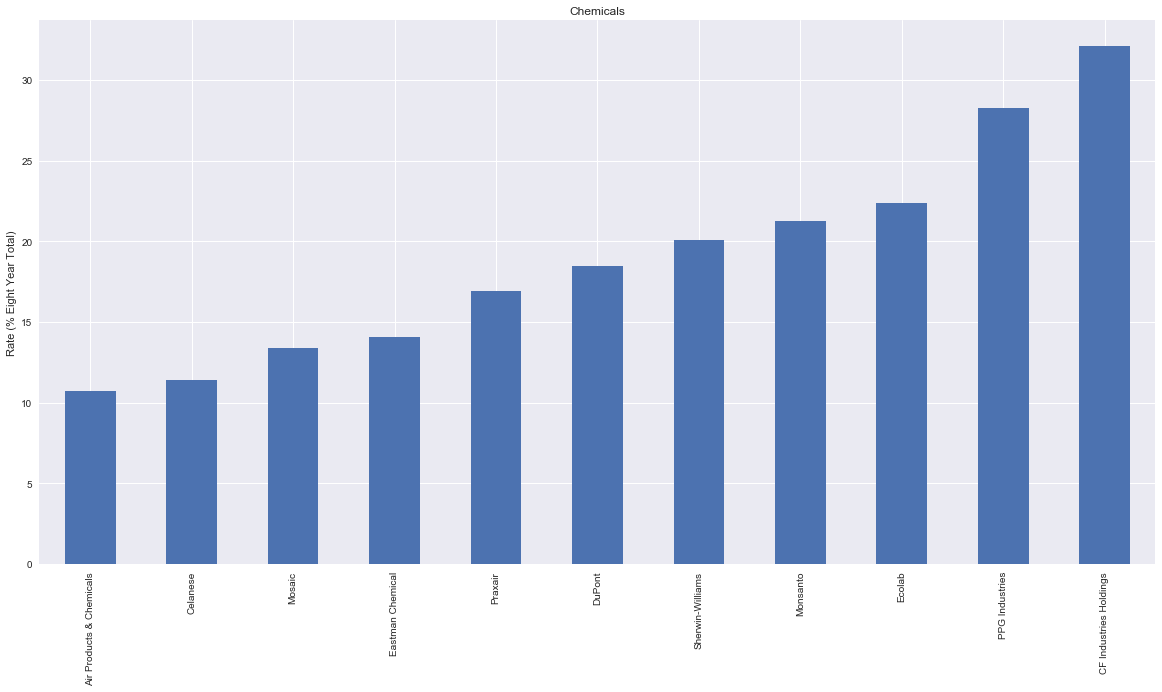

Effective Federal Tax Rate: 20.5 %


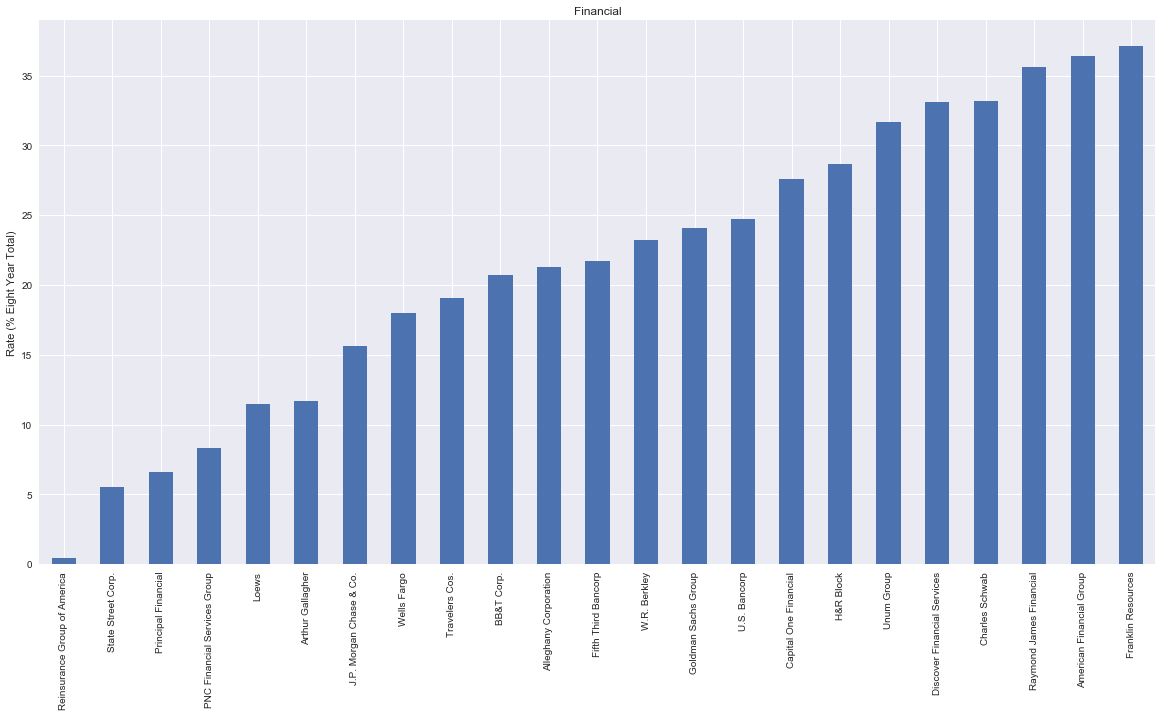

Effective Federal Tax Rate: 19.9 %


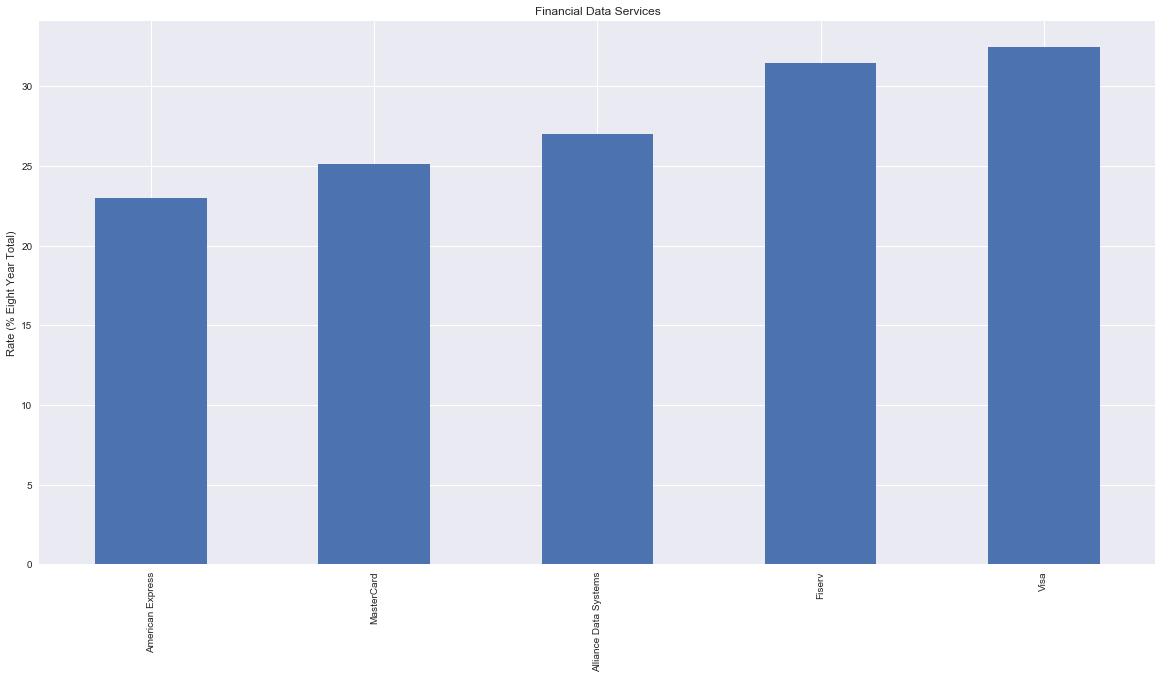

Effective Federal Tax Rate: 26.9 %


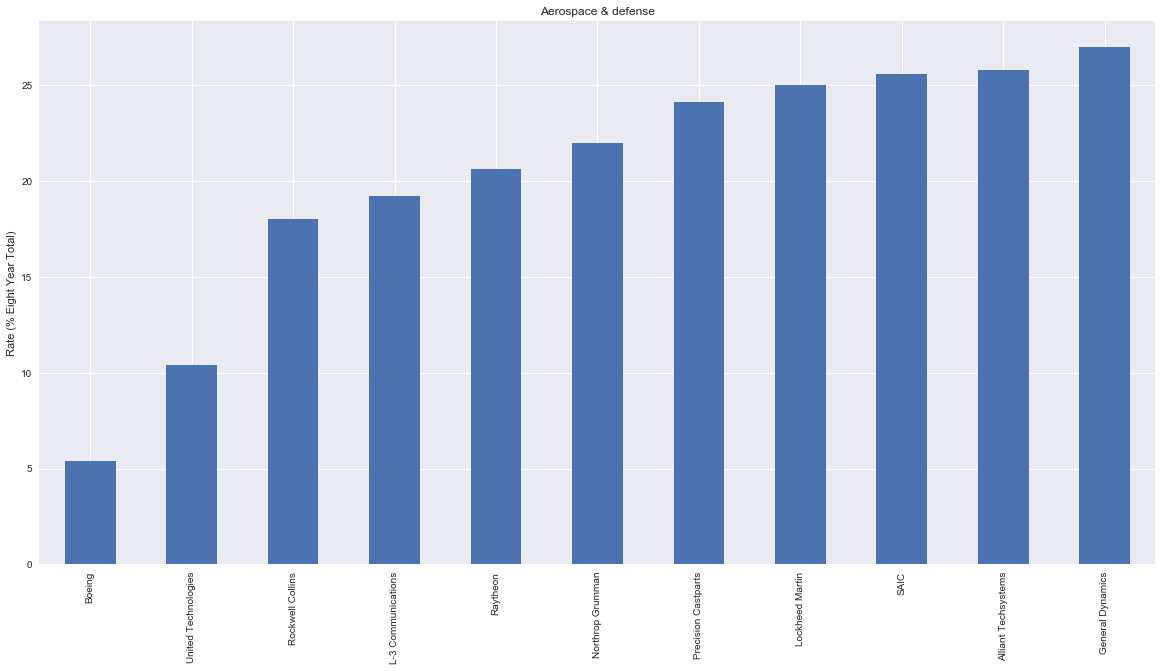

Effective Federal Tax Rate: 18.3 %


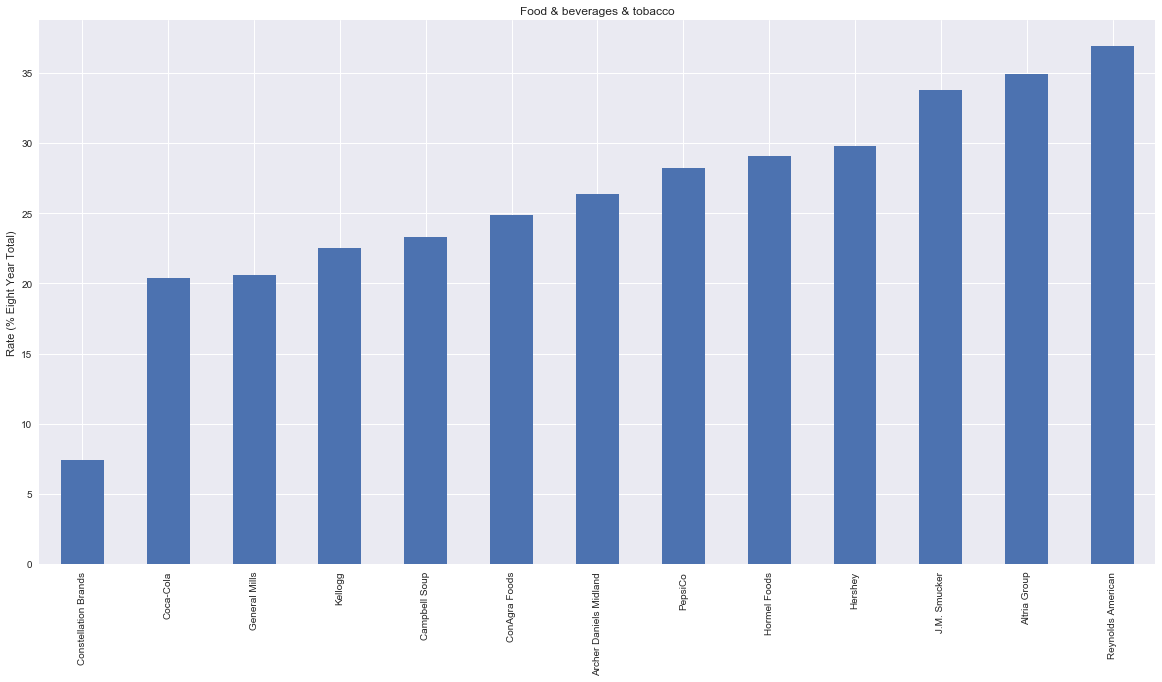

Effective Federal Tax Rate: 28.2 %


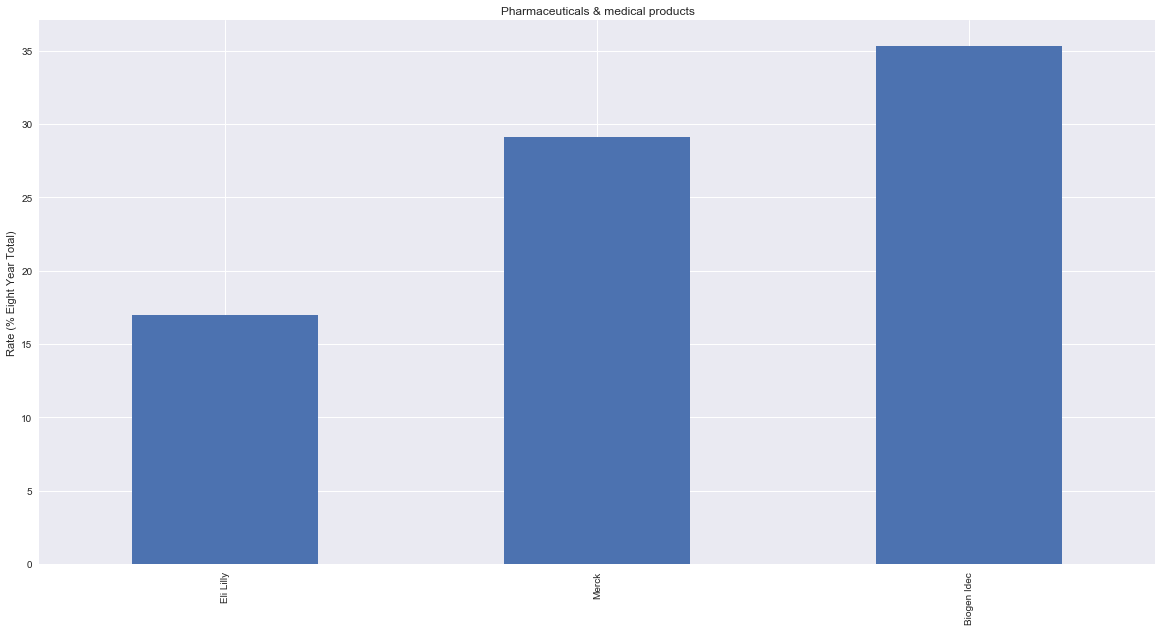

Effective Federal Tax Rate: 27.7 %


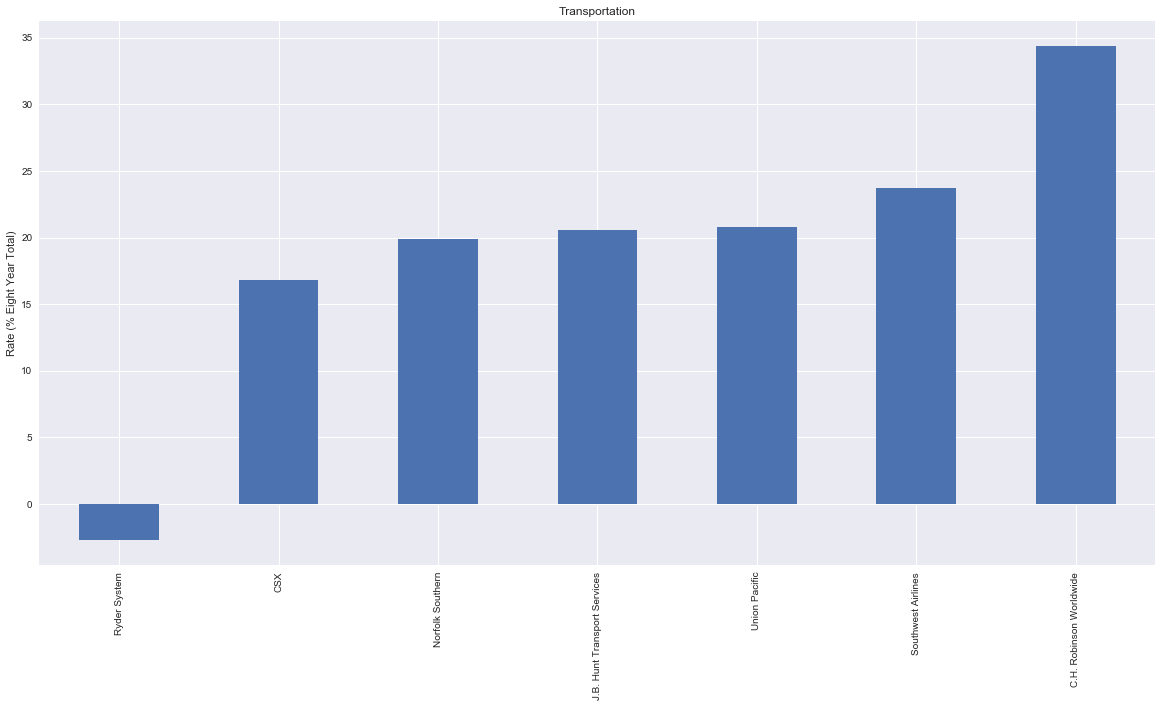

Effective Federal Tax Rate: 20.2 %


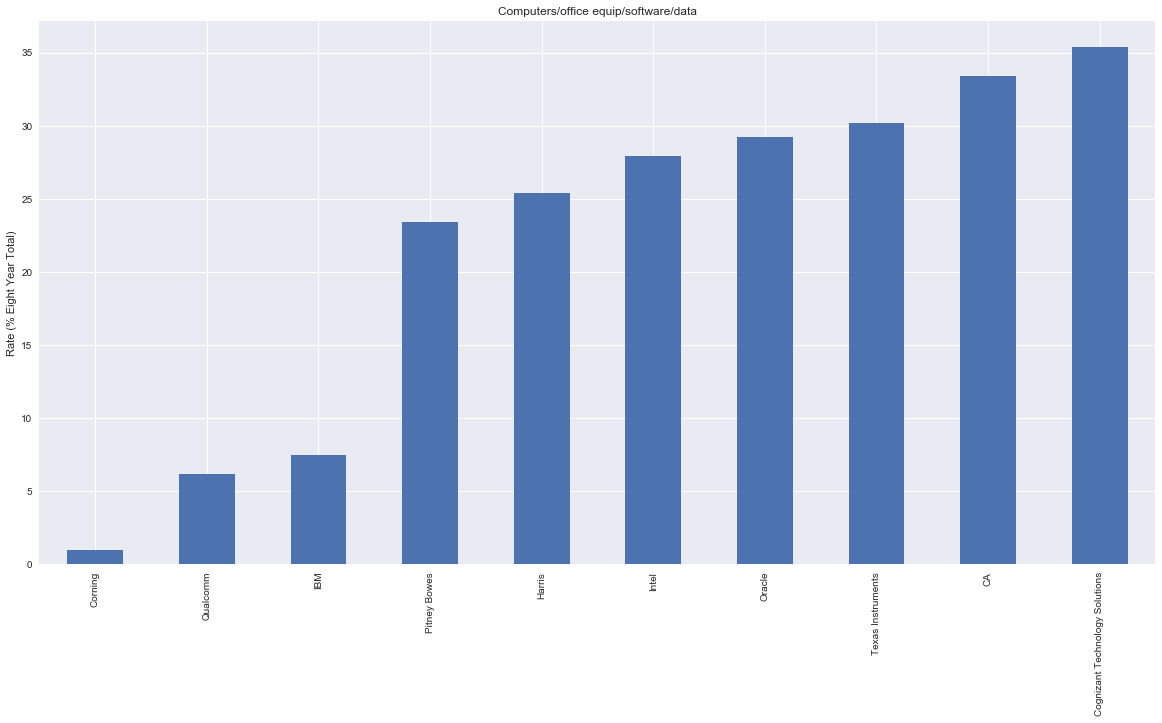

Effective Federal Tax Rate: 20.3 %


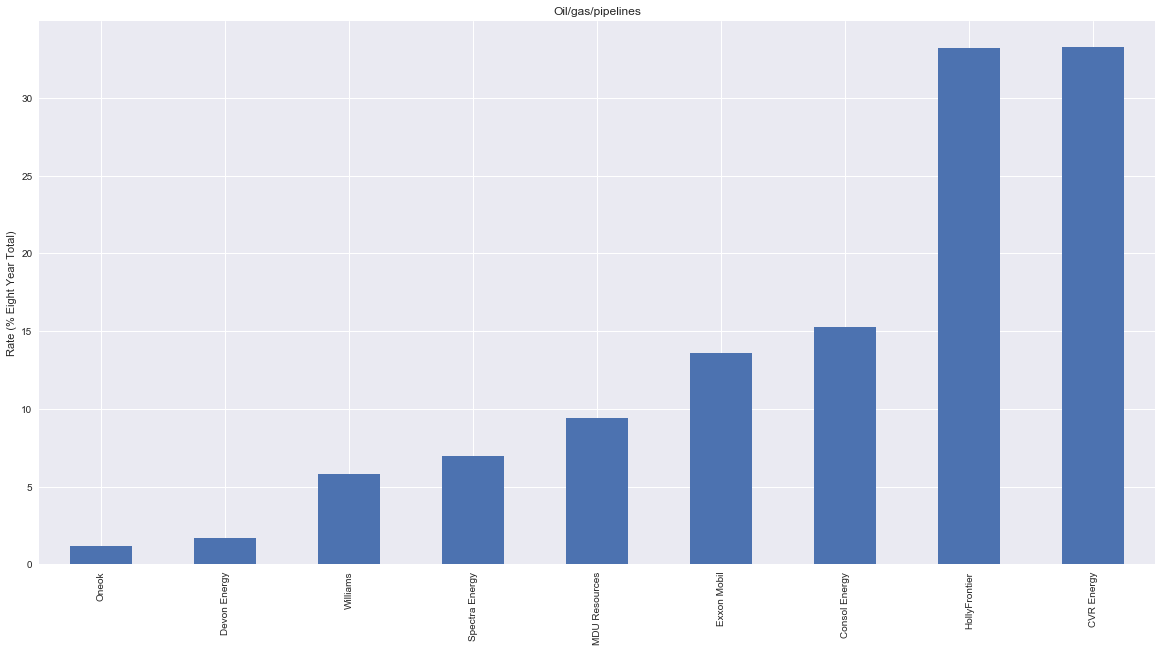

Effective Federal Tax Rate: 11.6 %


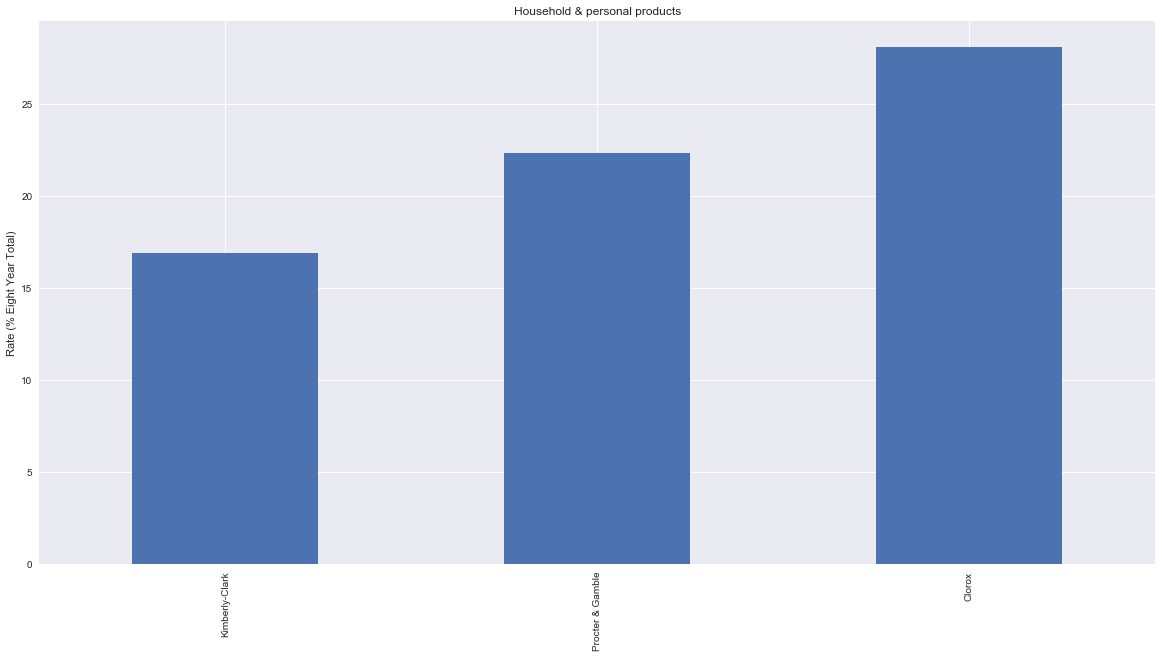

Effective Federal Tax Rate: 22.0 %


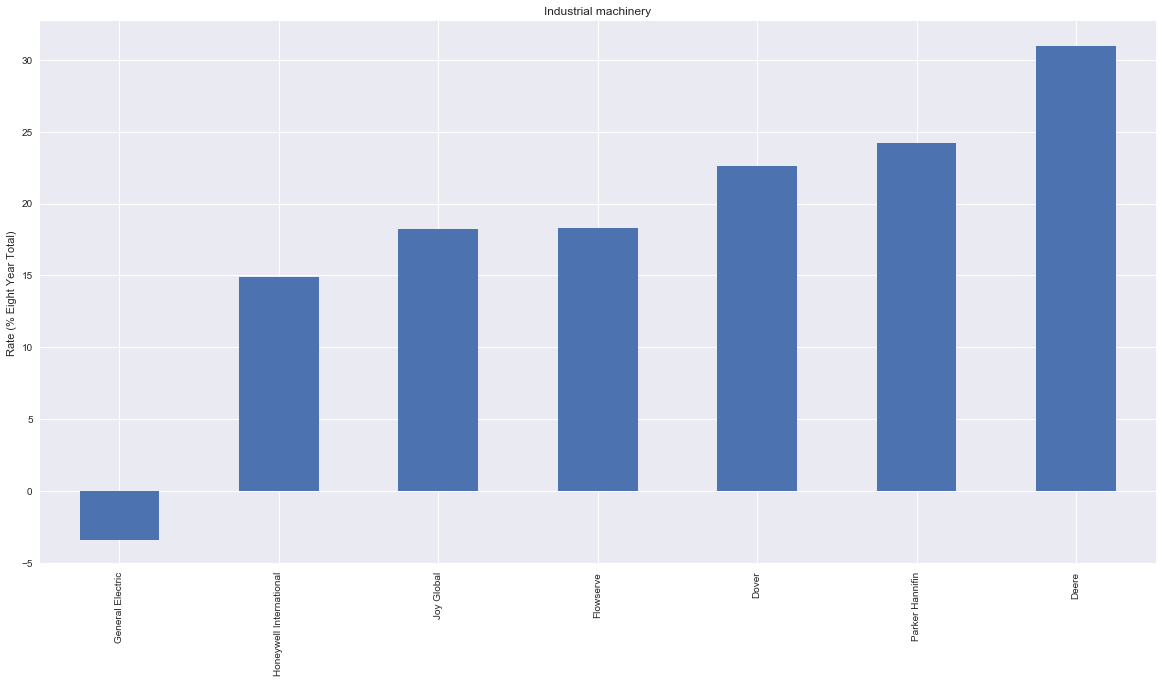

Effective Federal Tax Rate: 11.4 %


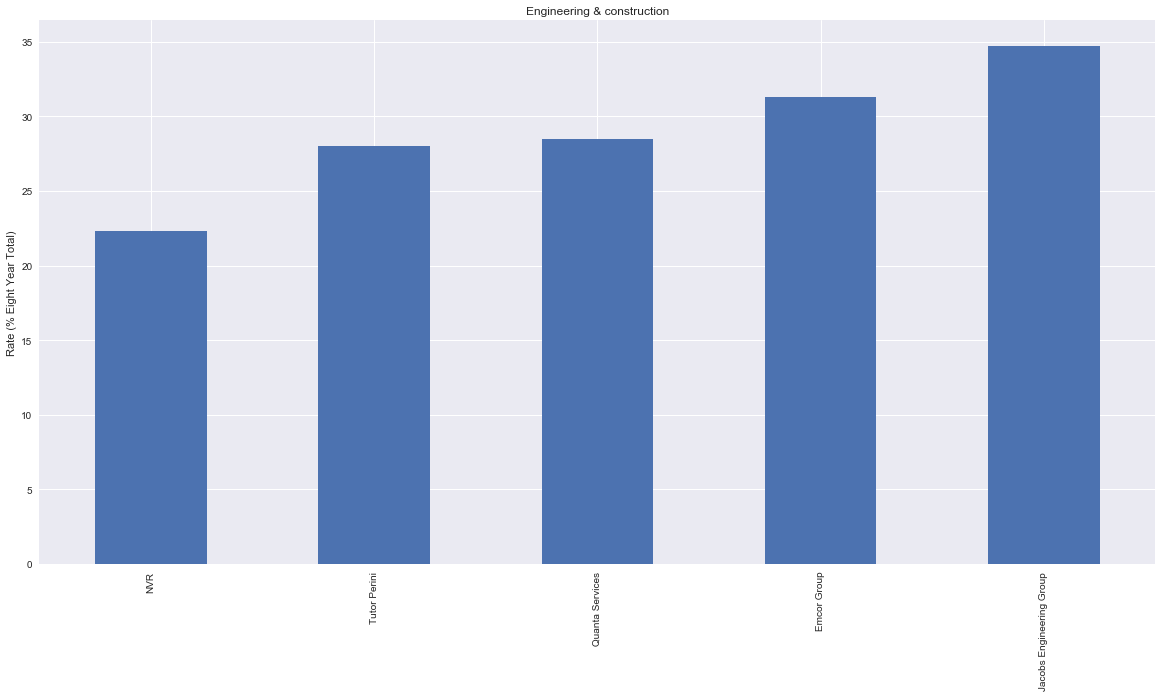

Effective Federal Tax Rate: 28.9 %


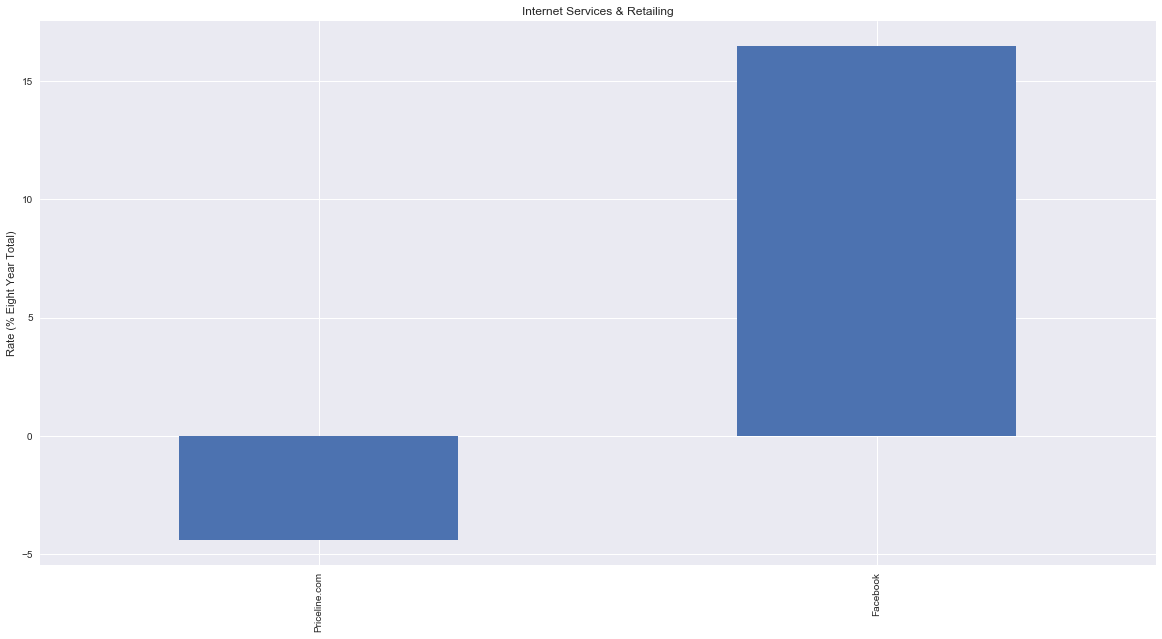

Effective Federal Tax Rate: 15.6 %


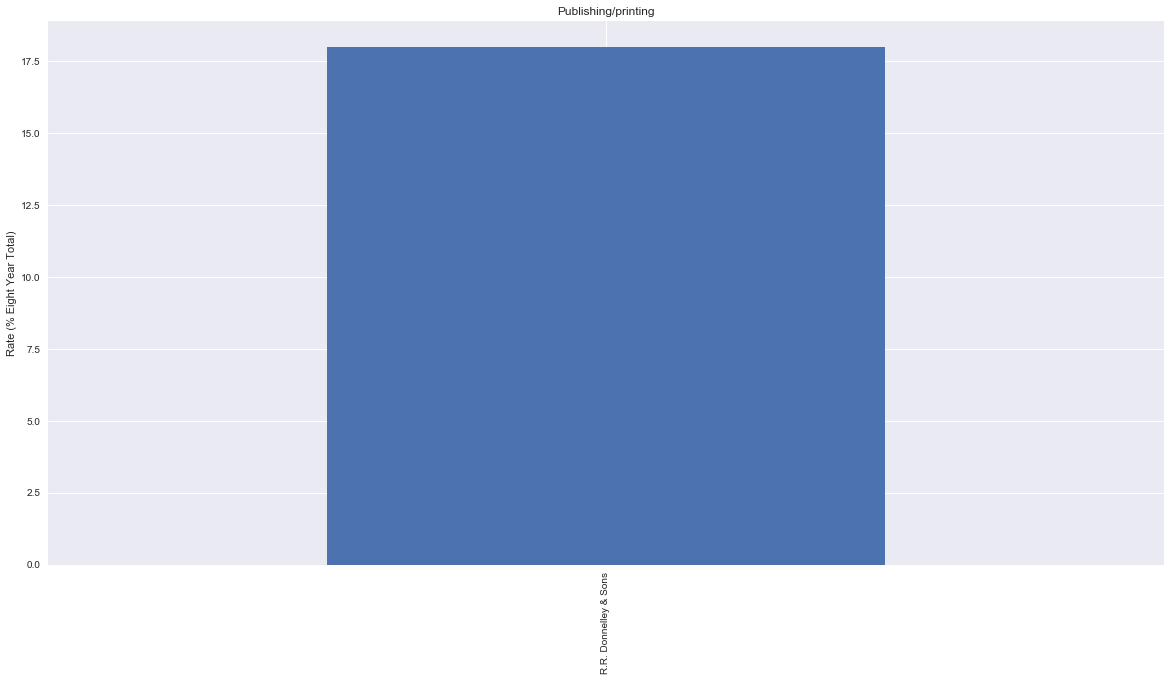

Effective Federal Tax Rate: 18.0 %


In [30]:
for industry in master_table['Industry'].unique():
    industry_slice = master_table[master_table['Industry'] == industry]
    industry_slice['Rate (% Eight Year Total)'].sort_values().plot('bar', title=industry).set_ylabel('Rate (% Eight Year Total)')
    plt.show()
    profit = industry_slice['Profit ($mil Eight Year Total)']
    tax = industry_slice['Tax ($mil Eight Year Total)']
    print('Effective Federal Tax Rate:', round(tax.mean() / profit.mean() * 100, 1), '%')

#### Report A industry representation

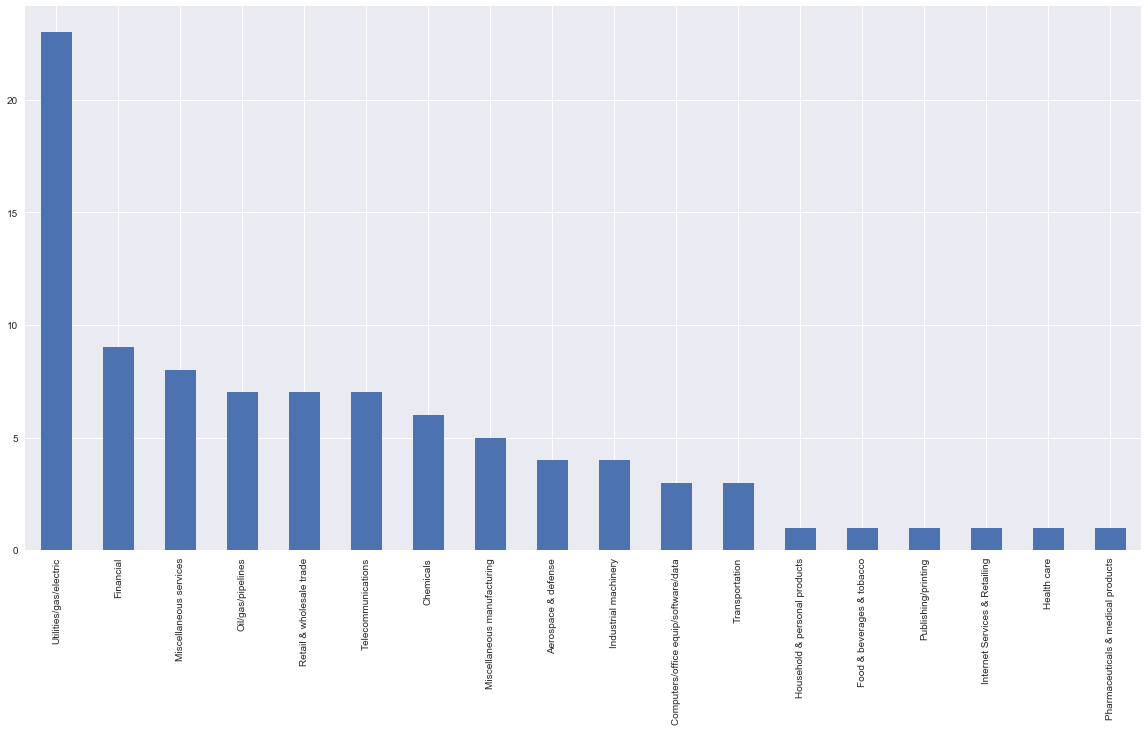

In [31]:
master_table[pd.notnull(master_table['Employee count (# end of 2016)'])]['Industry'].value_counts().plot('bar')

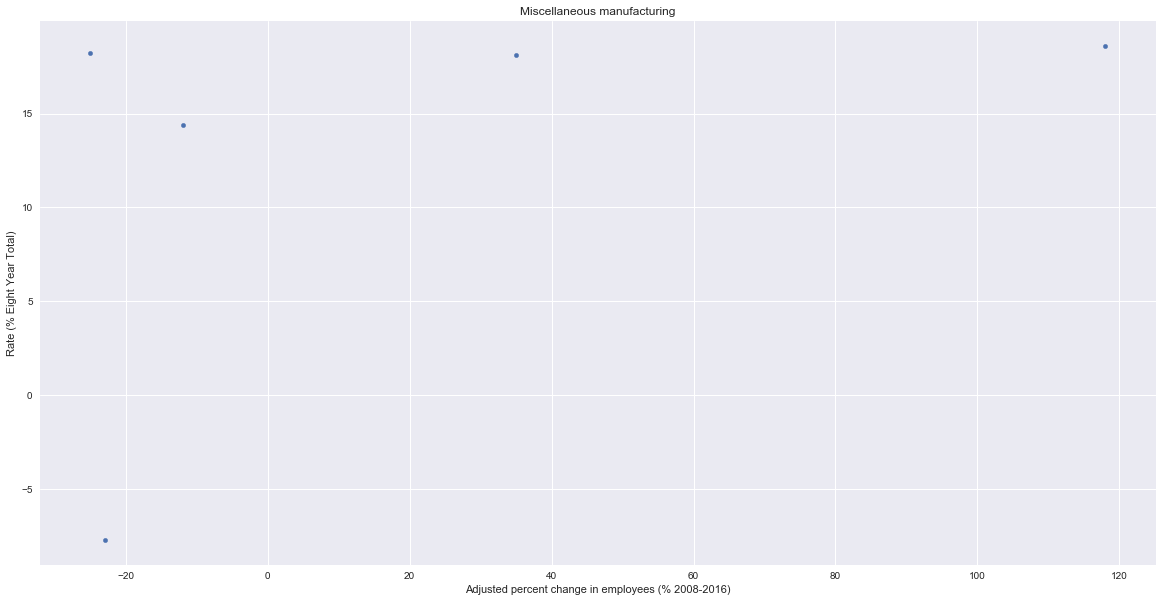

5


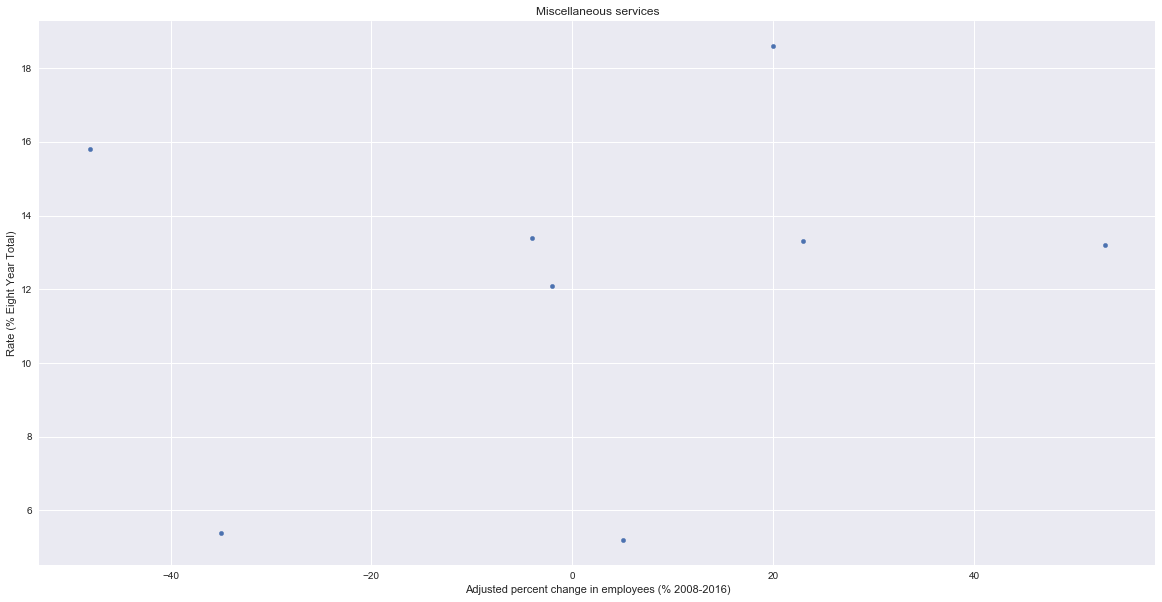

8


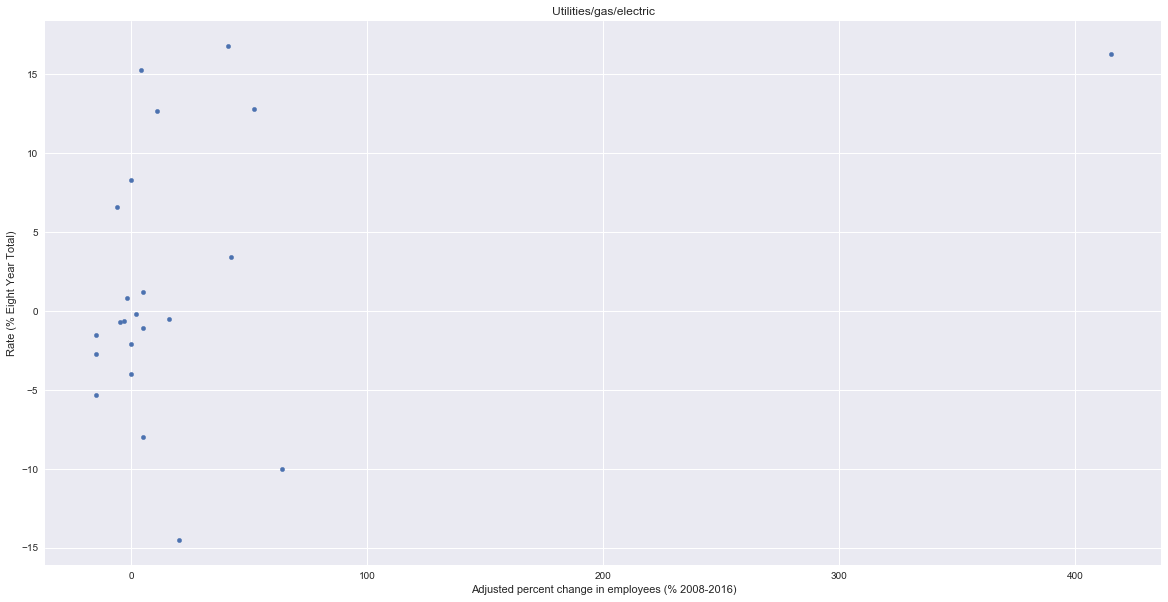

23


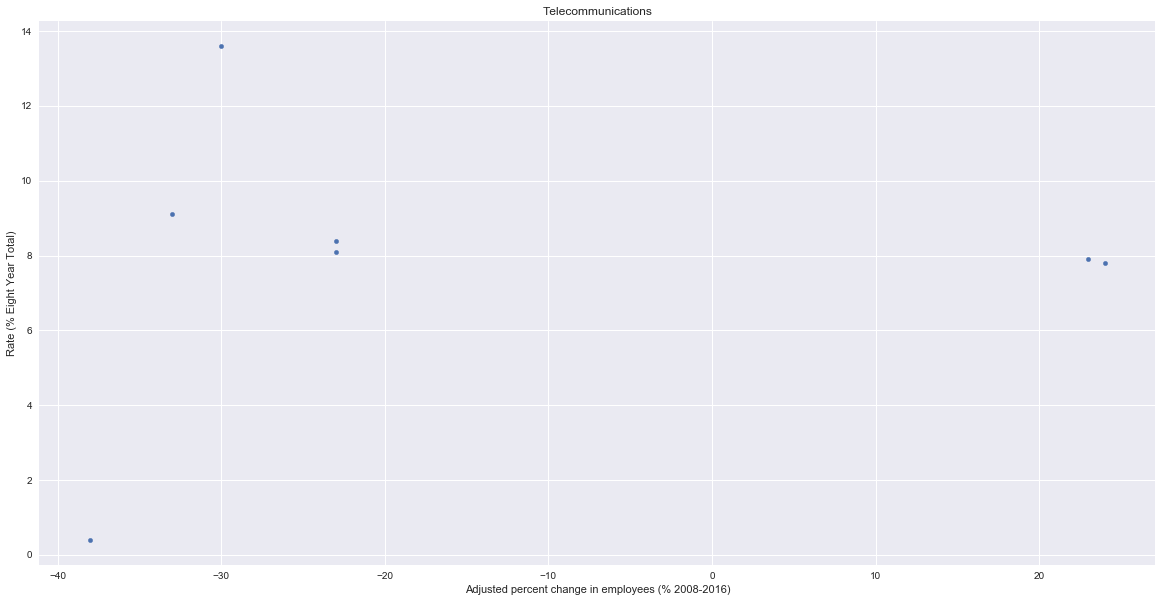

7


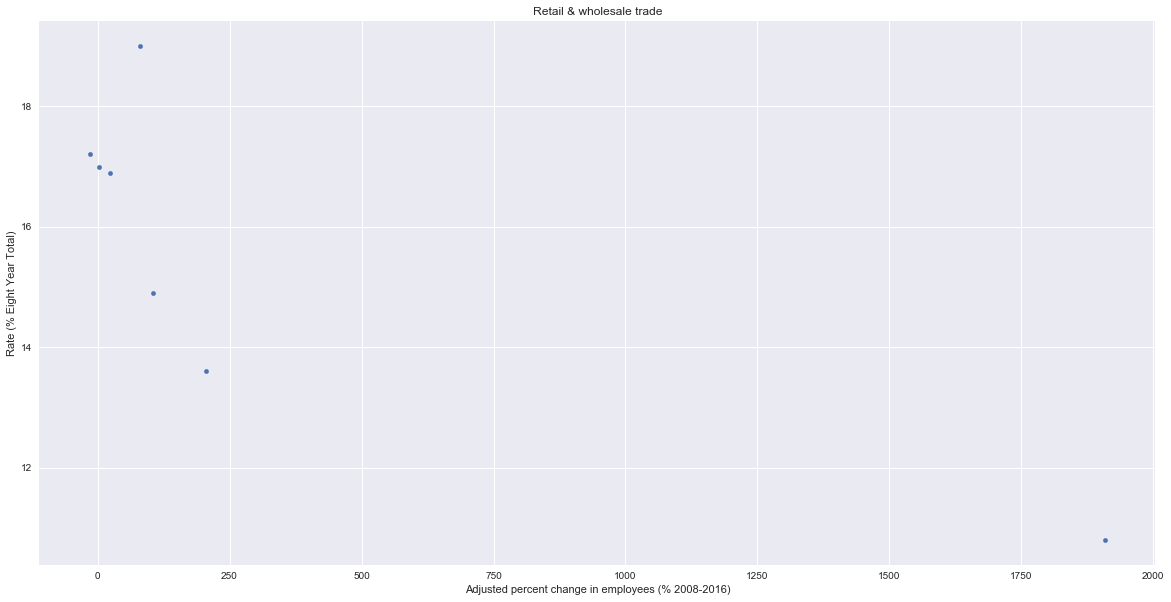

7


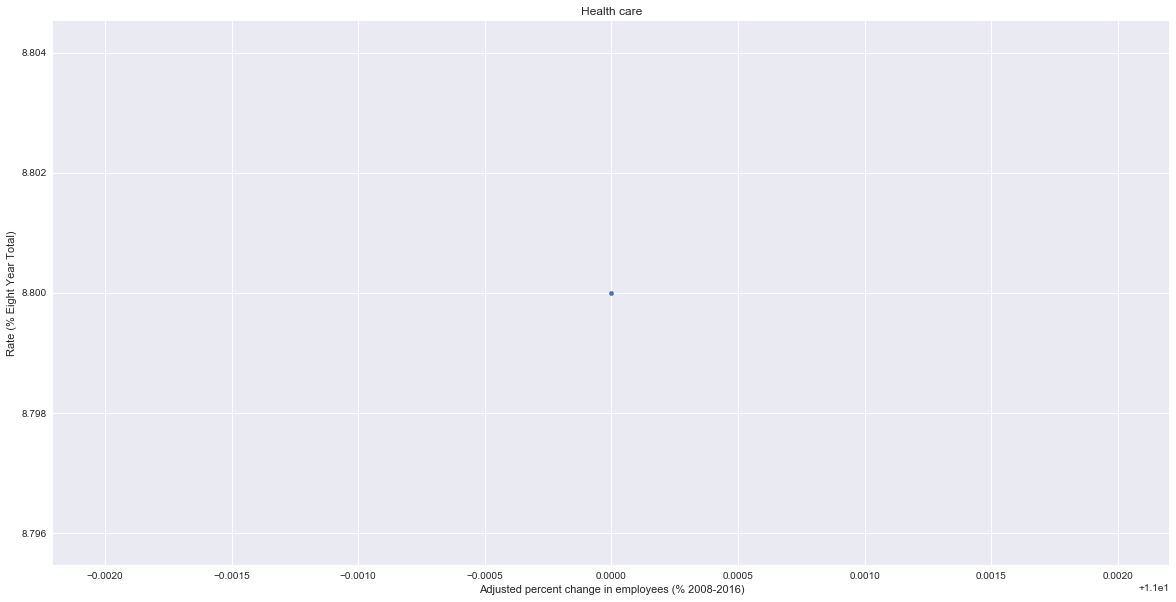

1


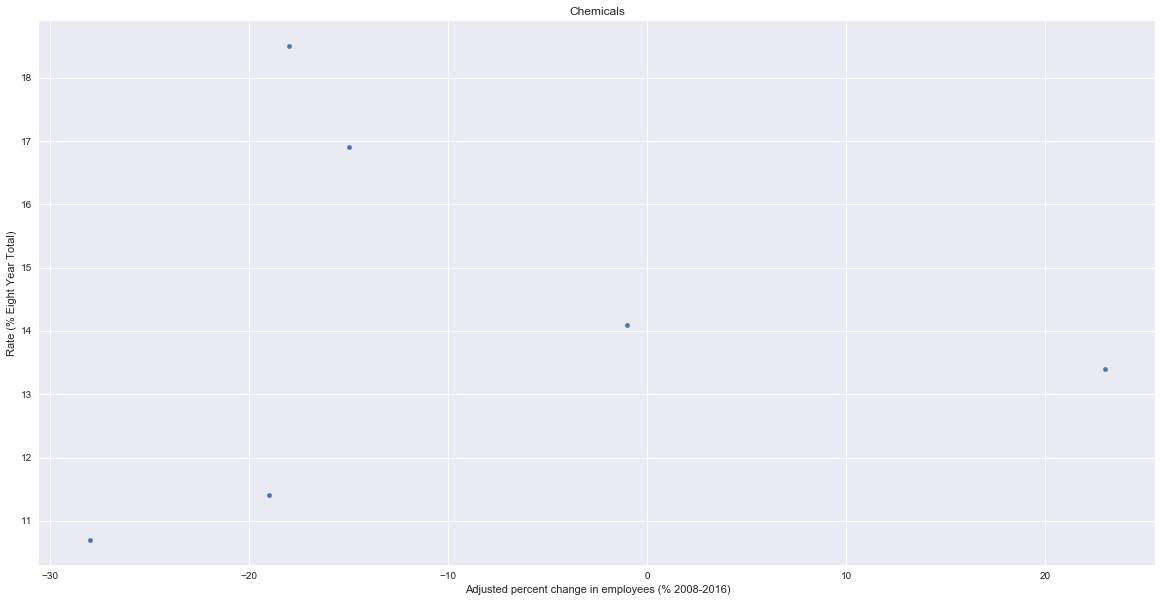

6


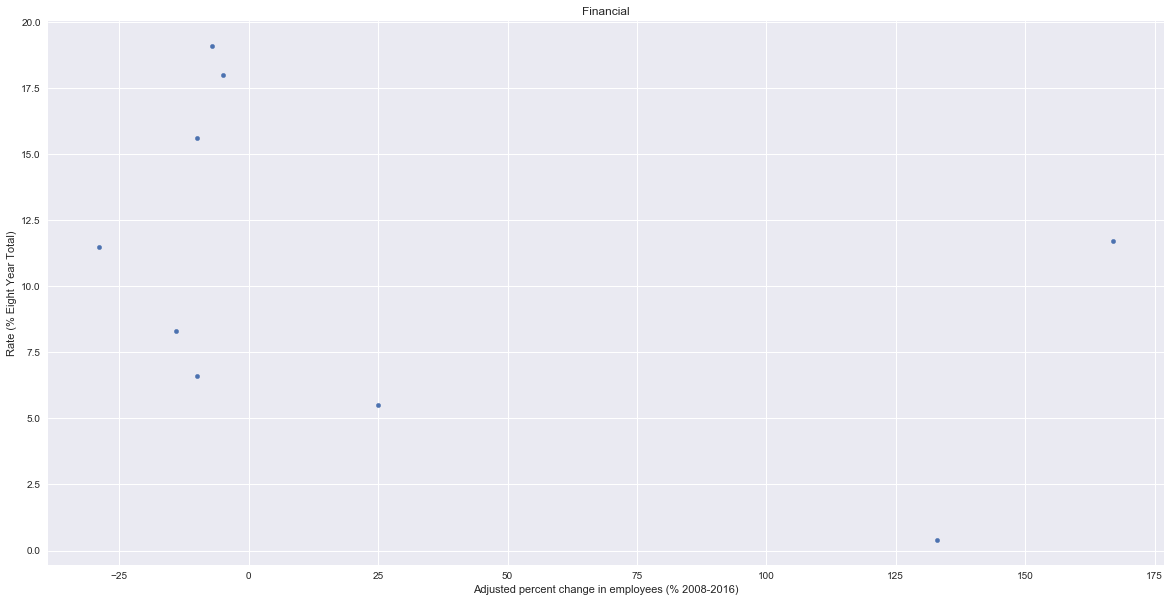

9


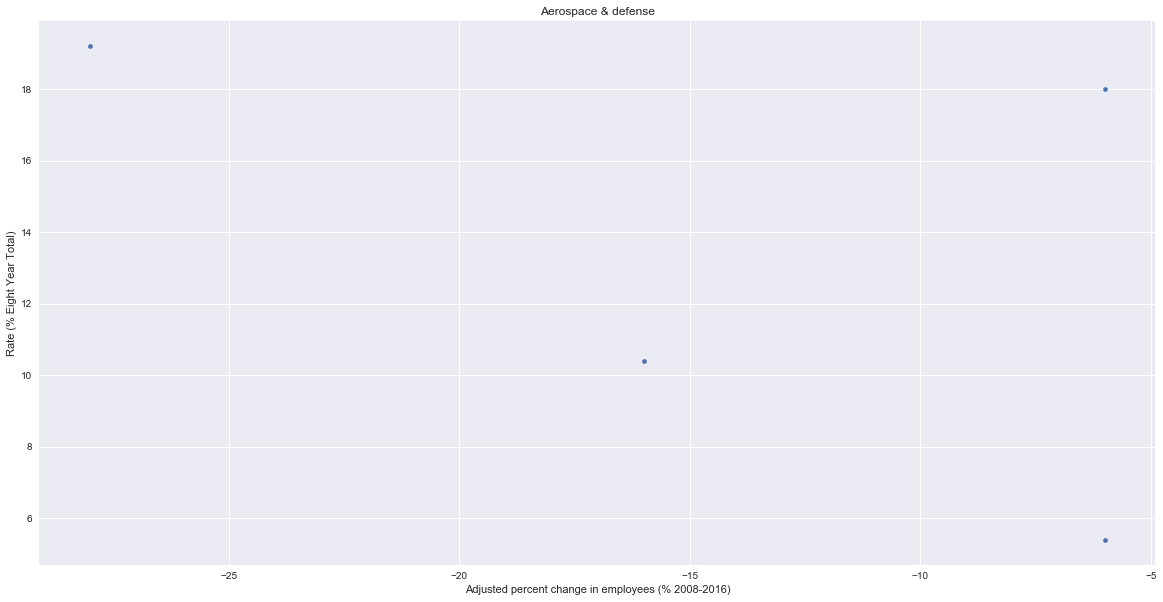

4


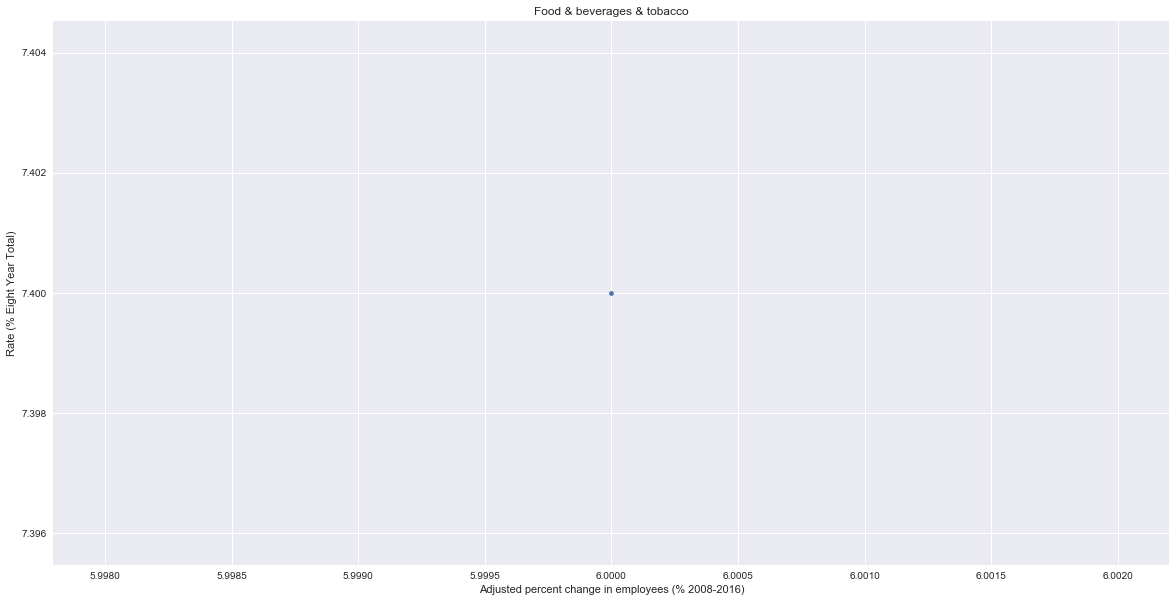

1


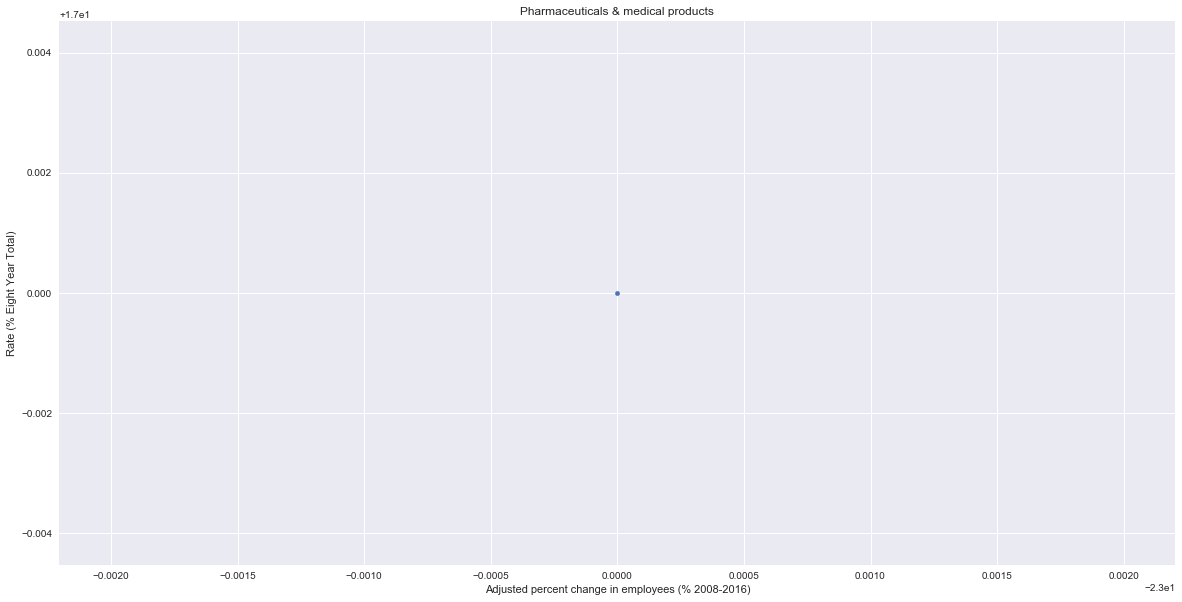

1


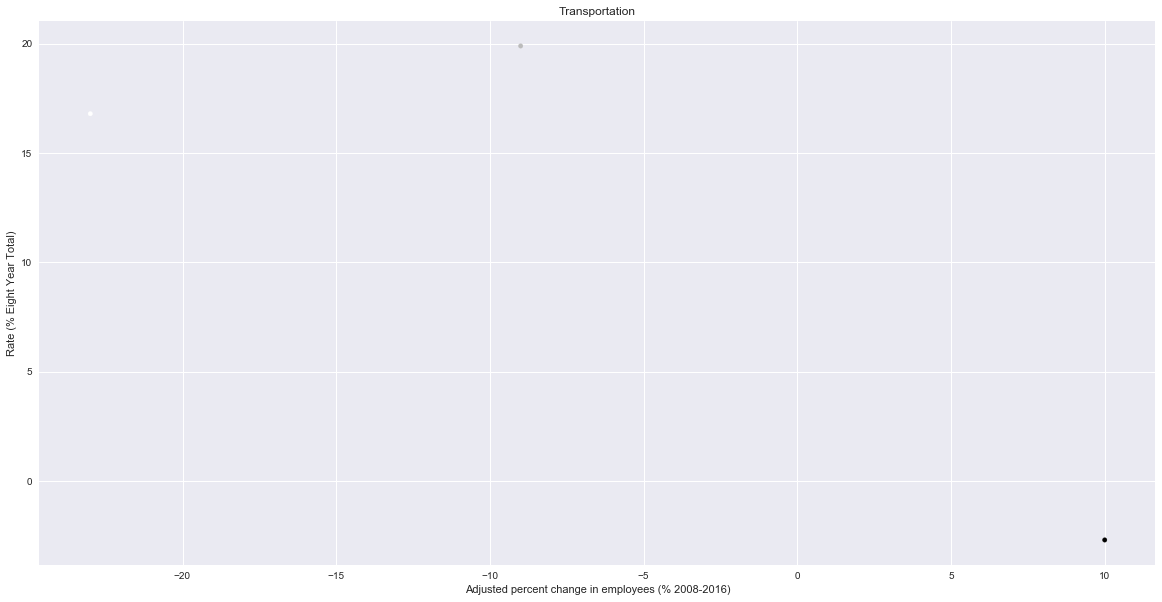

3


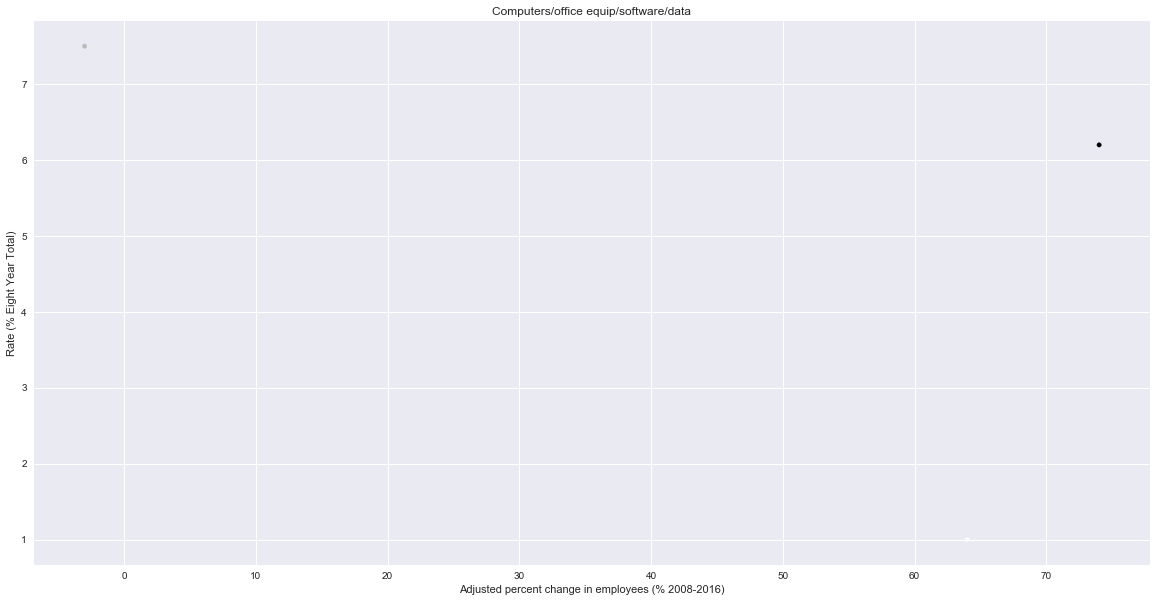

3


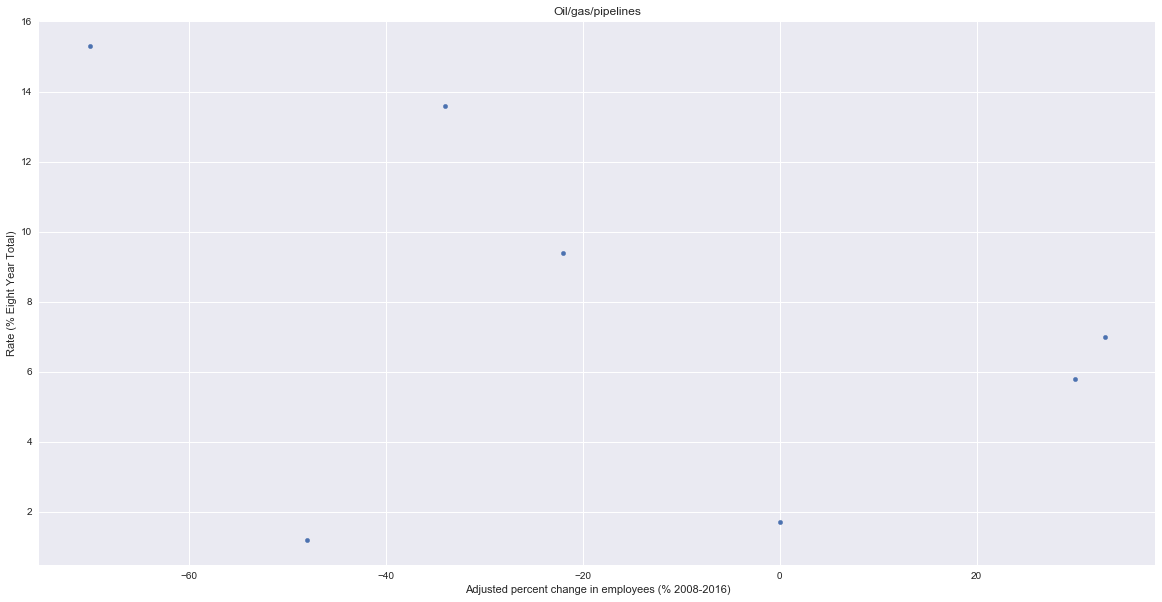

7


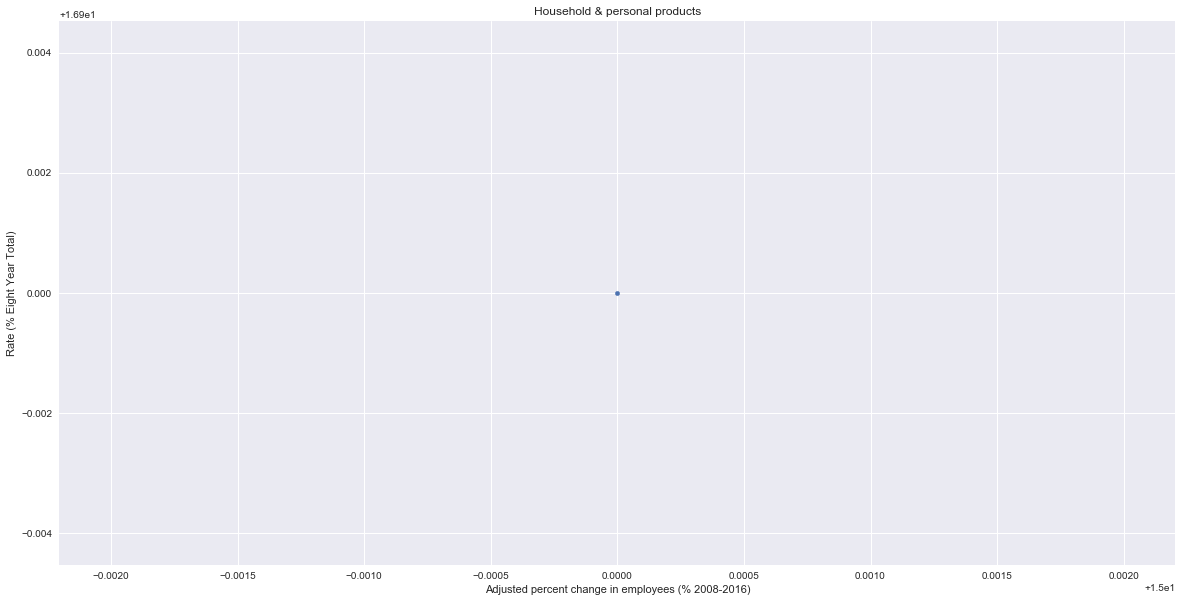

1


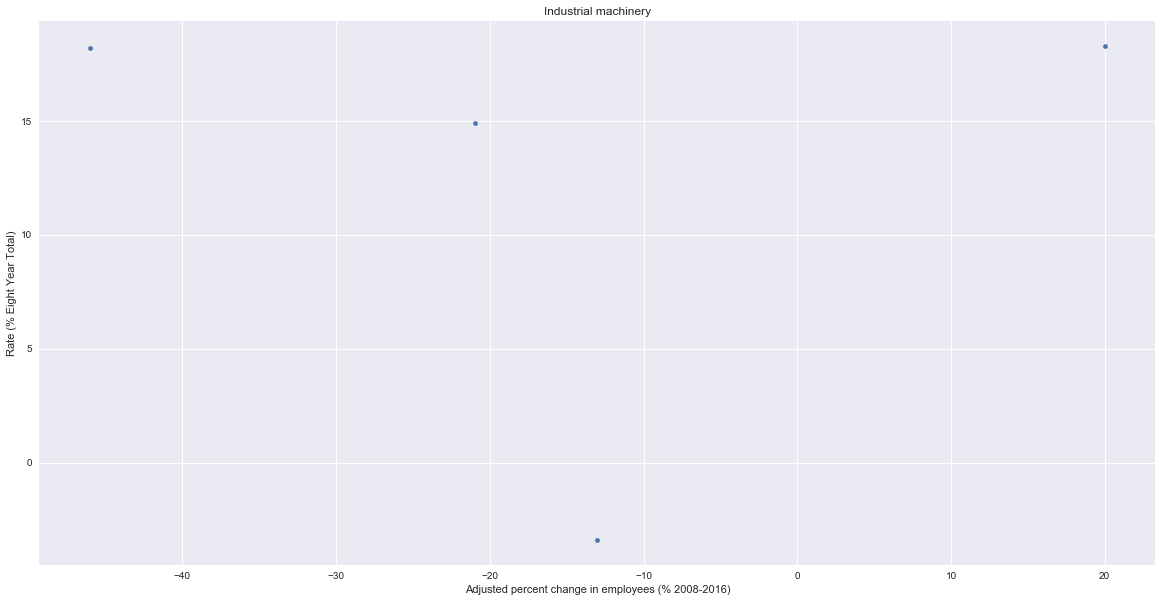

4


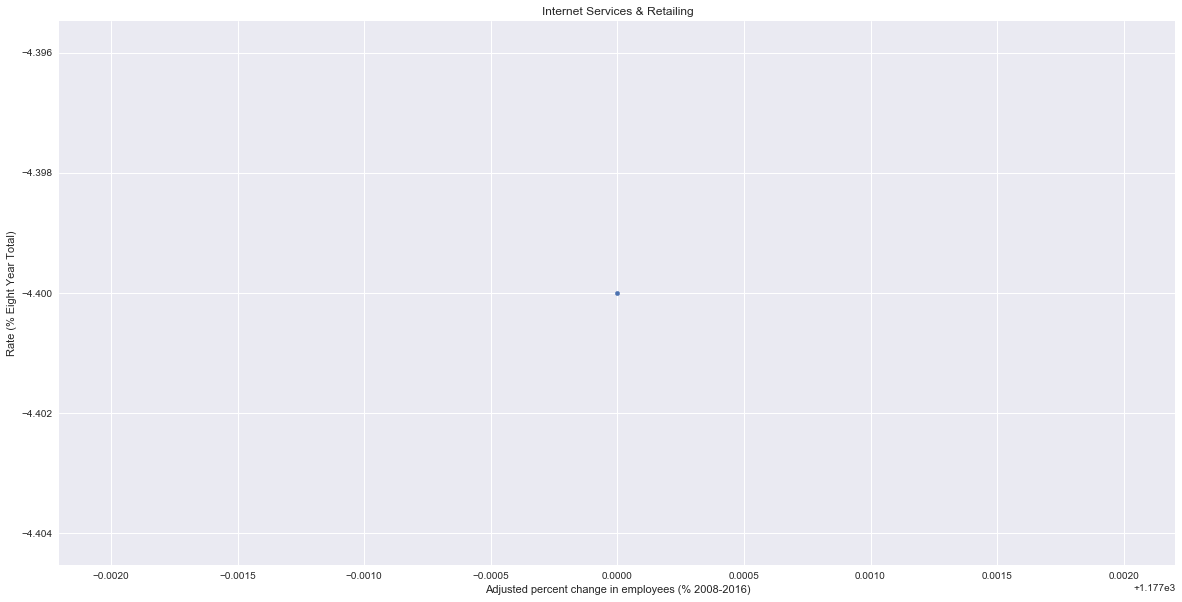

1


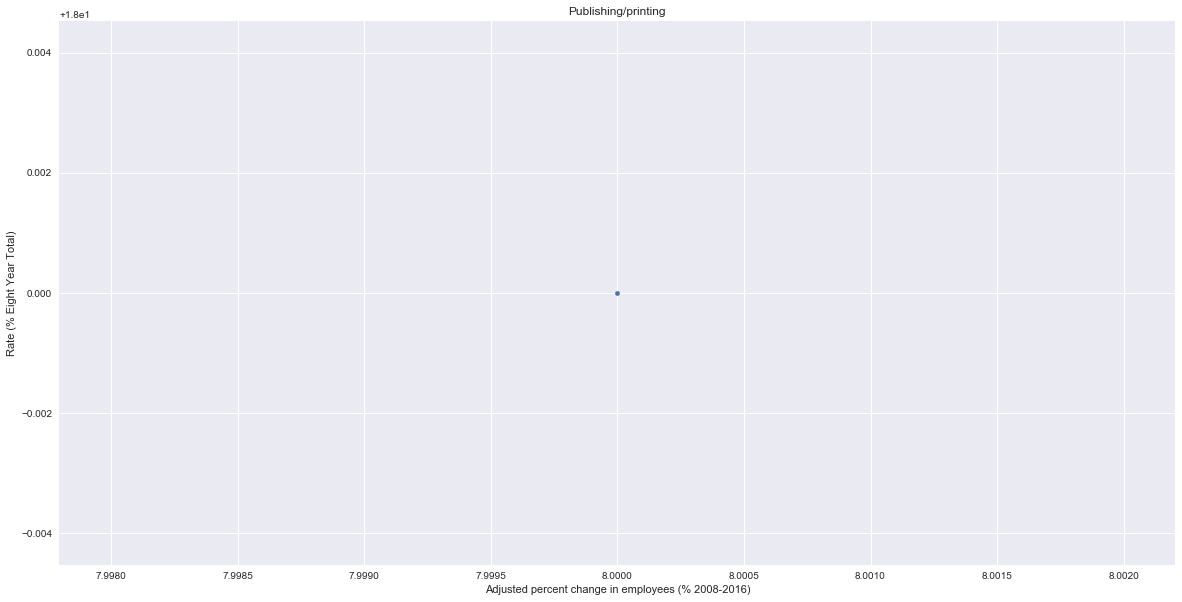

1


In [32]:
for industry in master_table['Industry'].unique():
    industry_slice = master_table[master_table['Industry'] == industry]
    industry_slice_ftd = industry_slice[pd.notnull(industry_slice['Adjusted percent change in employees (% 2008-2016)'])]
    industry_slice_ftd_change = industry_slice_ftd['Adjusted percent change in employees (% 2008-2016)']
    industry_slice_ftd_rate = industry_slice_ftd['Rate (% Eight Year Total)']

    if len(industry_slice_ftd_change):
        scatter_df = pd.DataFrame([industry_slice_ftd_change,industry_slice_ftd_rate]).T
        scatter_df.plot(kind='scatter', x='Adjusted percent change in employees (% 2008-2016)', y='Rate (% Eight Year Total)', title=industry)
        plt.show()
        print(len(scatter_df))

Notes:
- There's not enough companies per industry in some cases for it to be worth focusing on this component

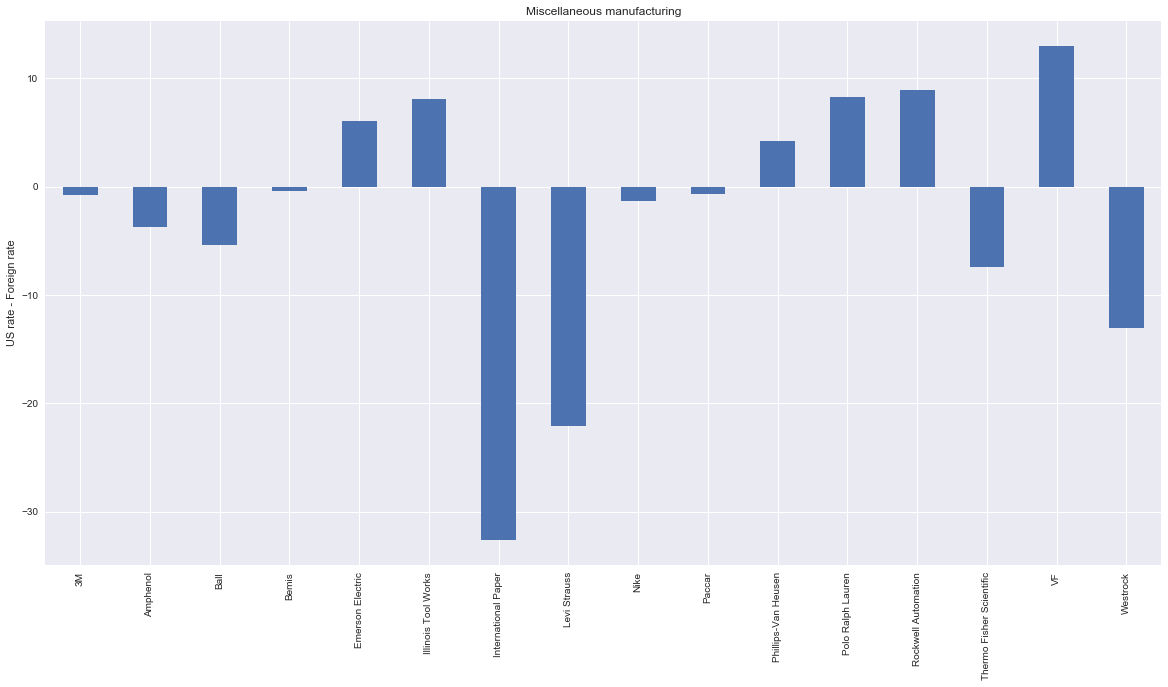

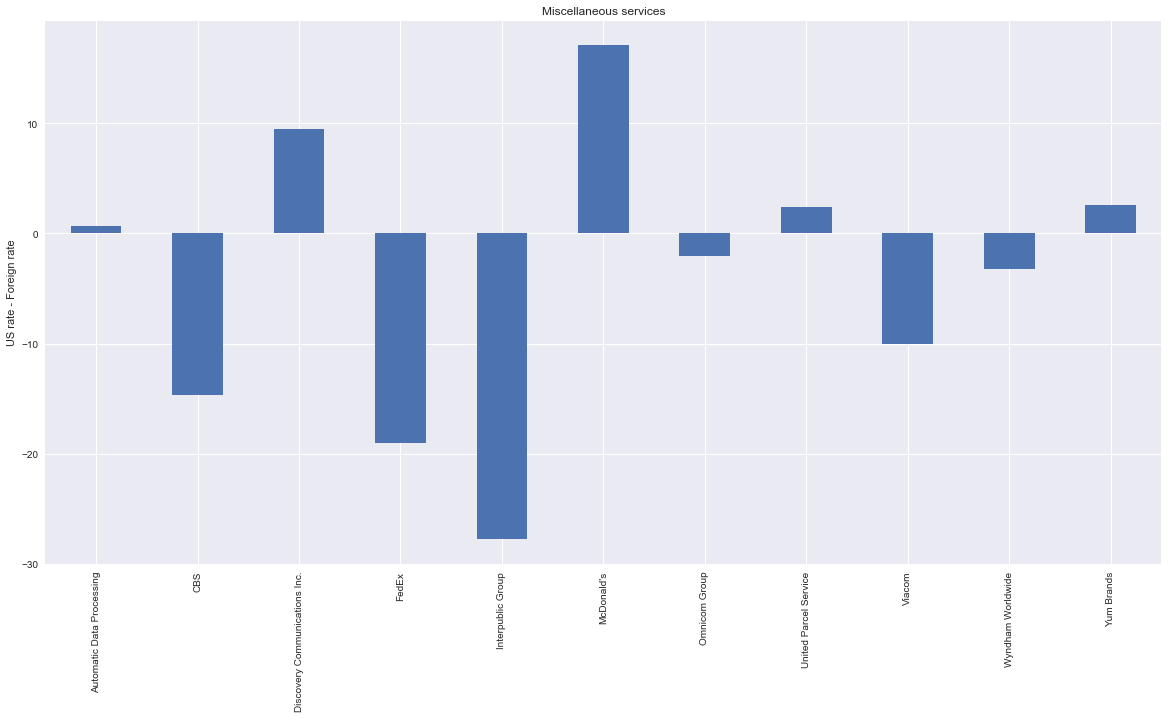

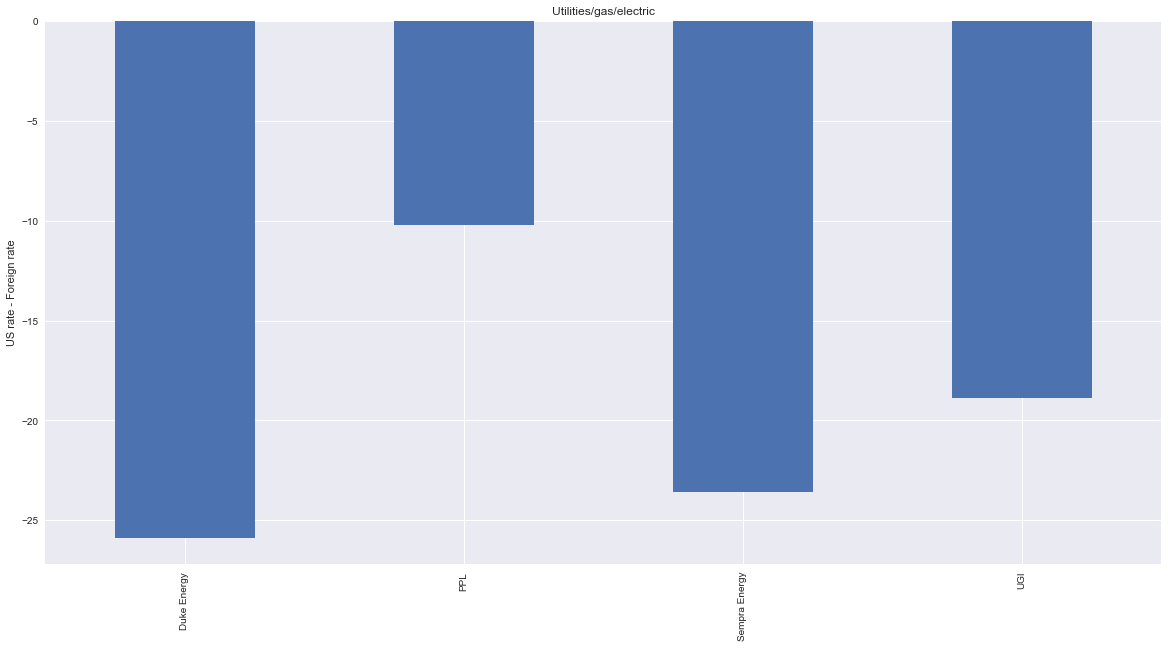

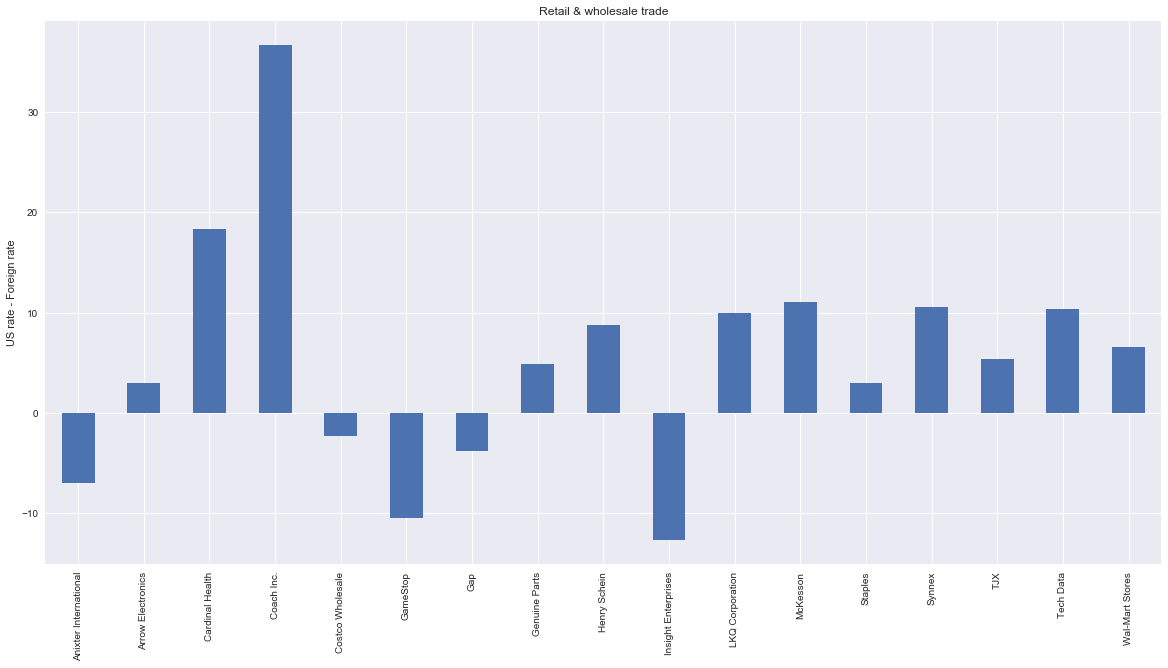

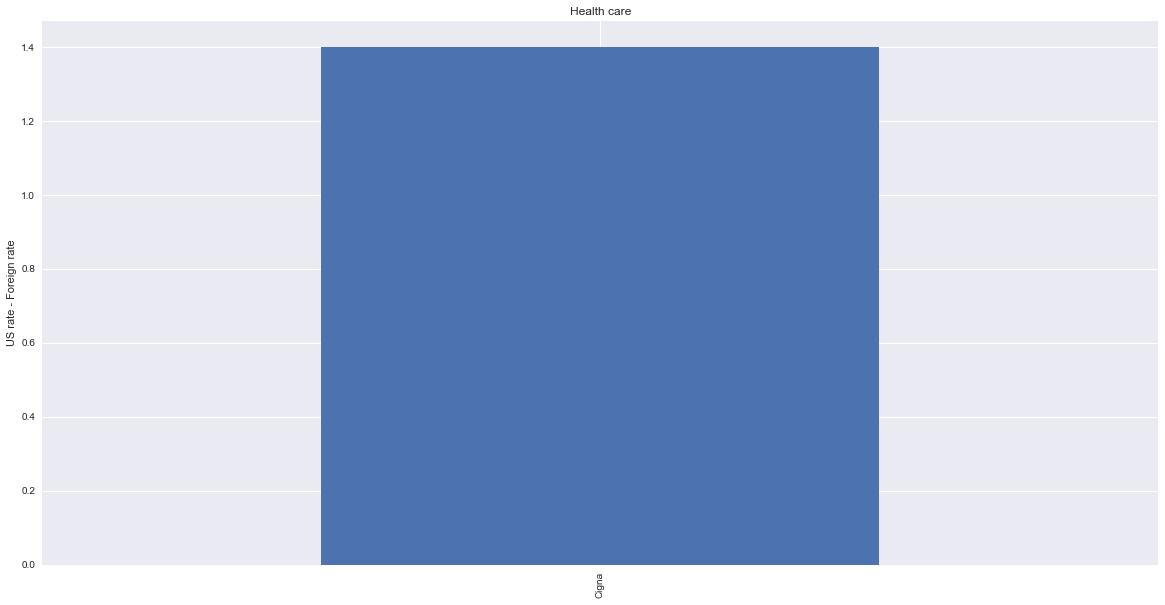

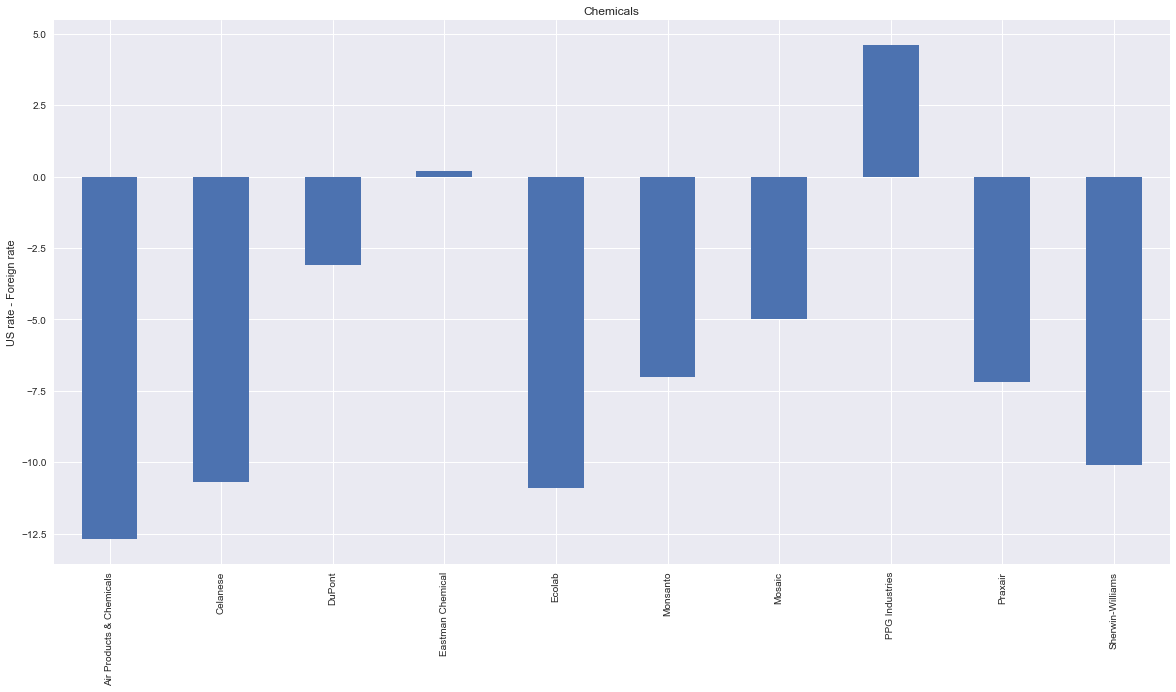

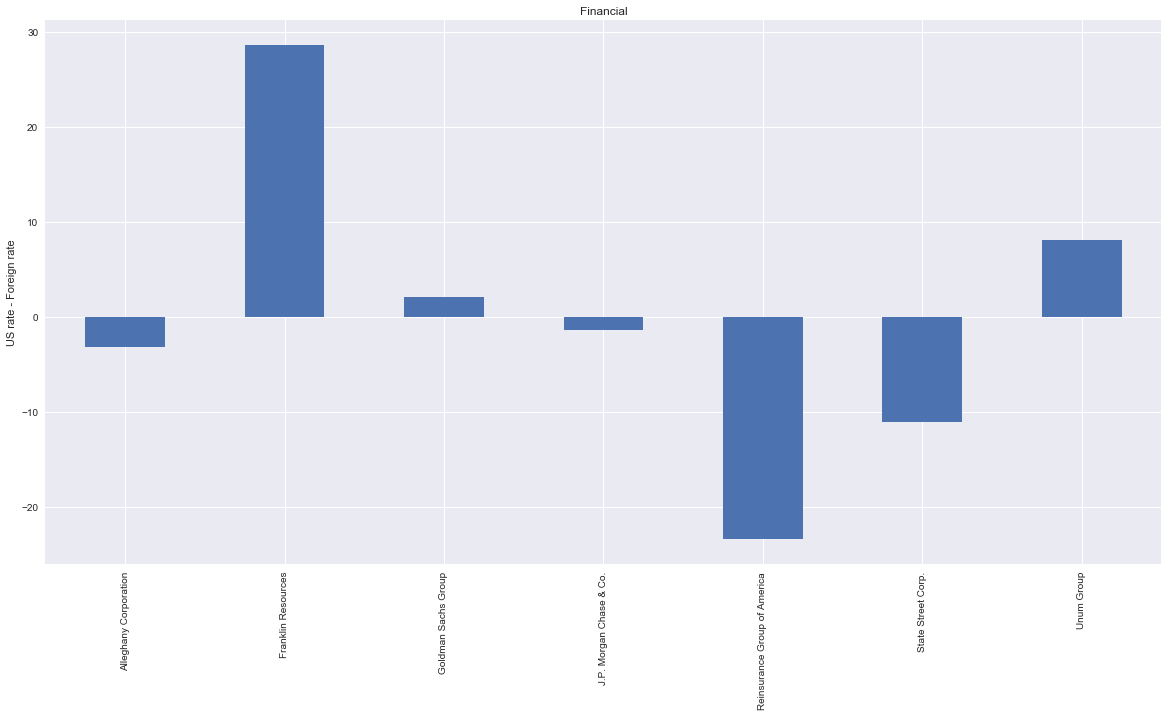

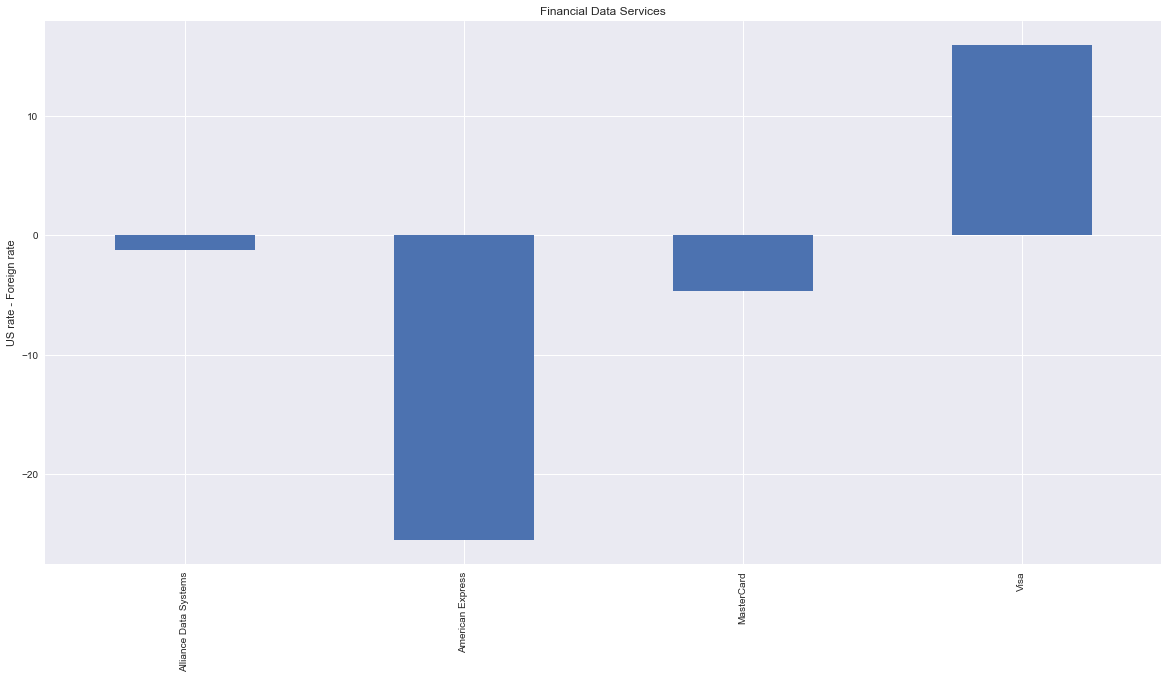

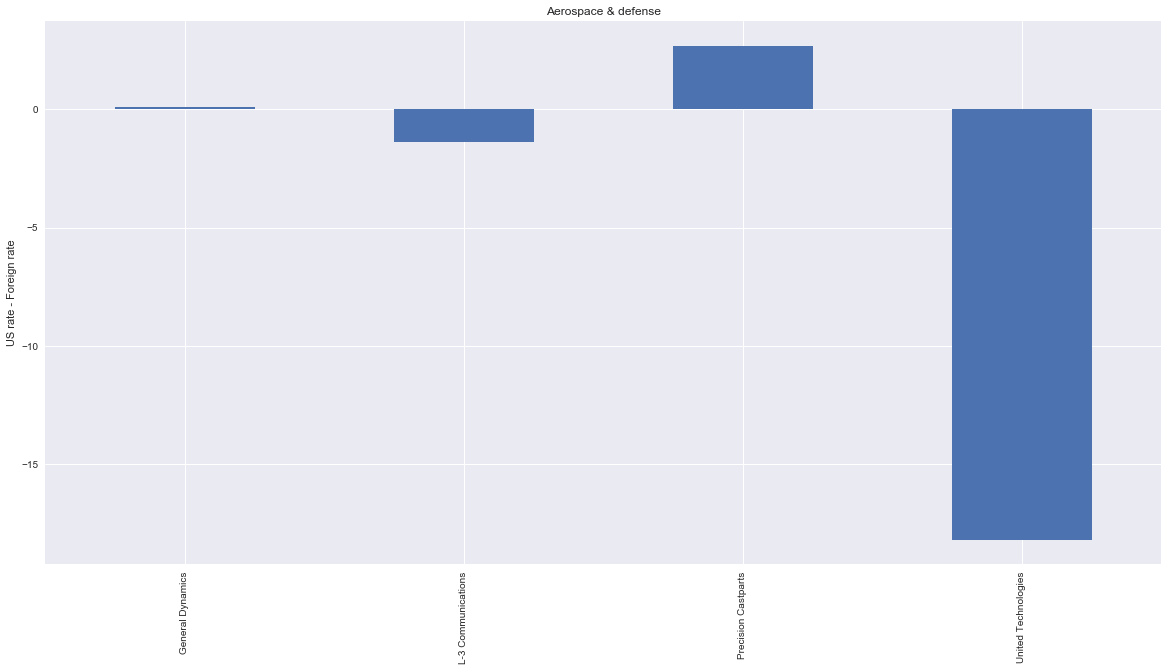

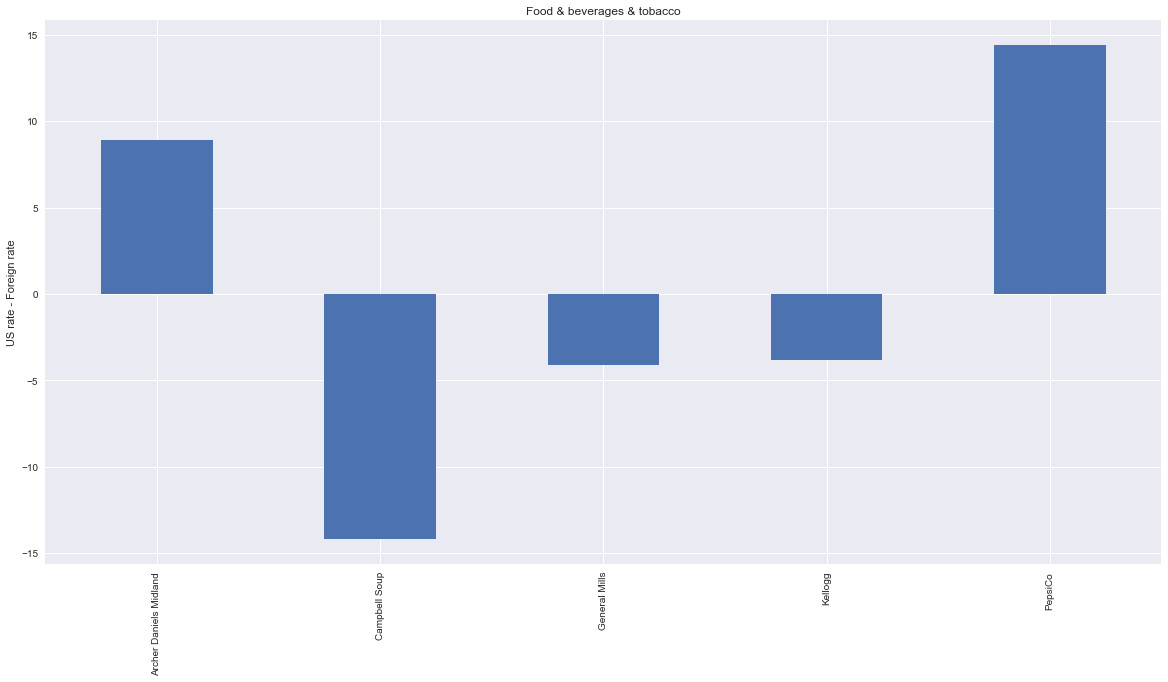

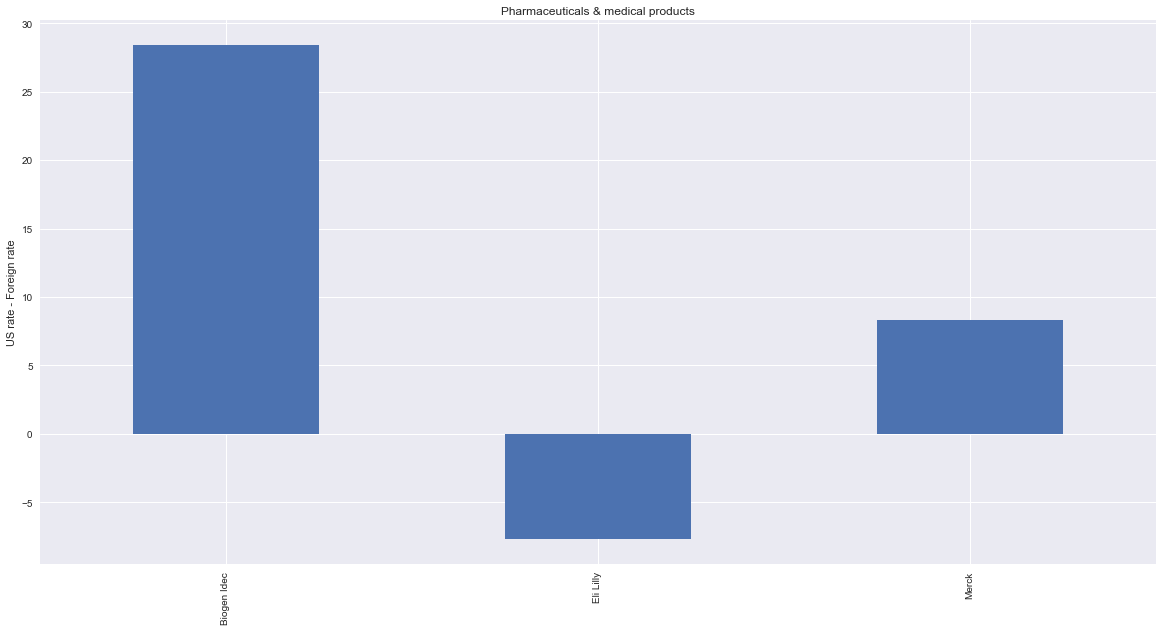

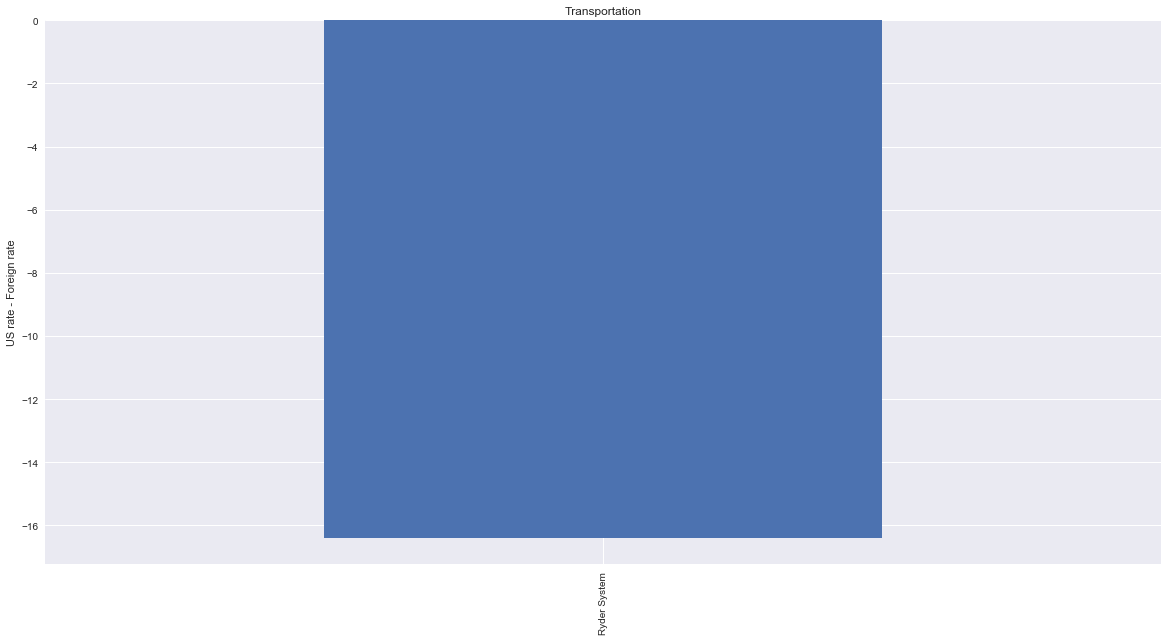

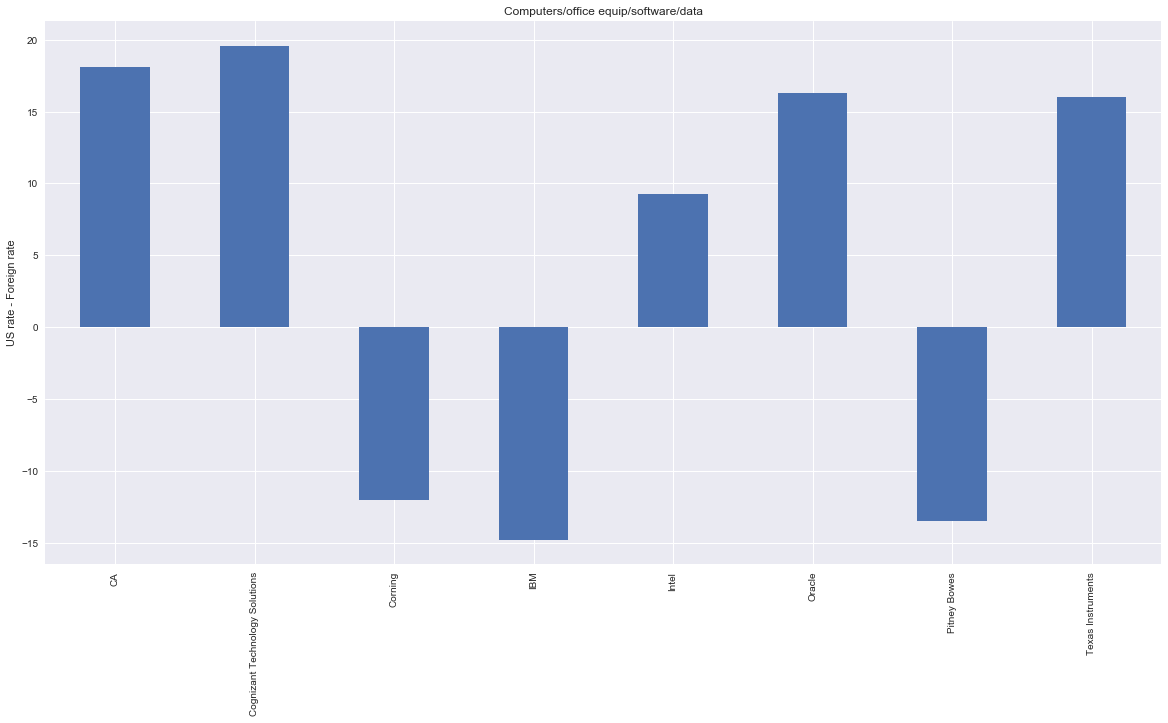

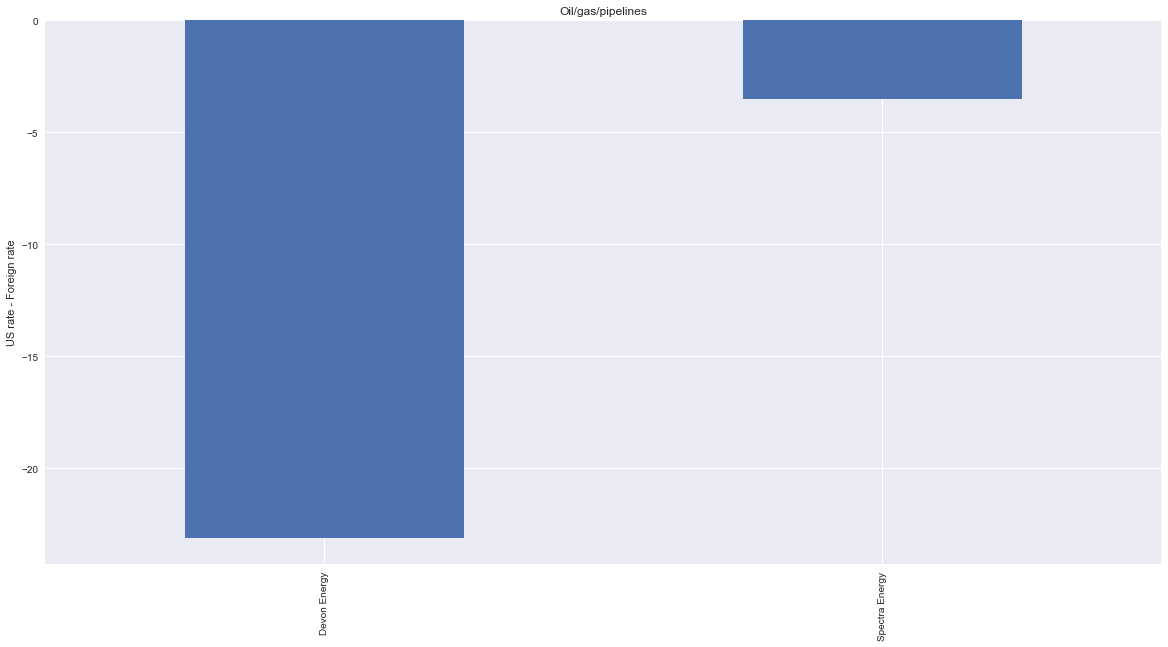

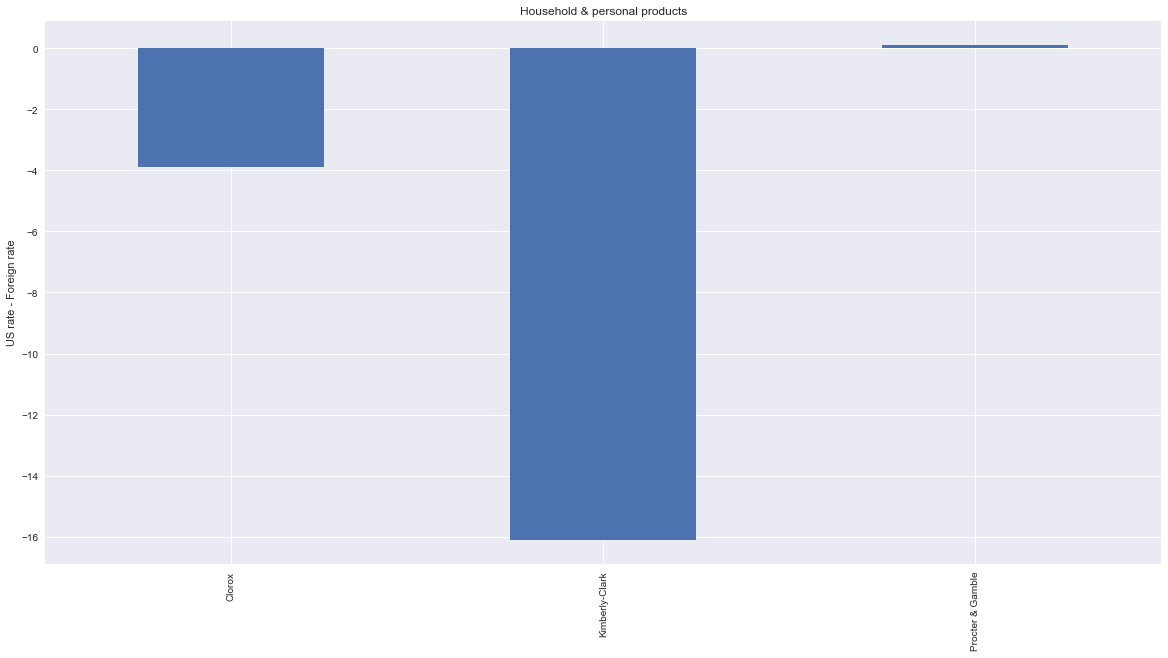

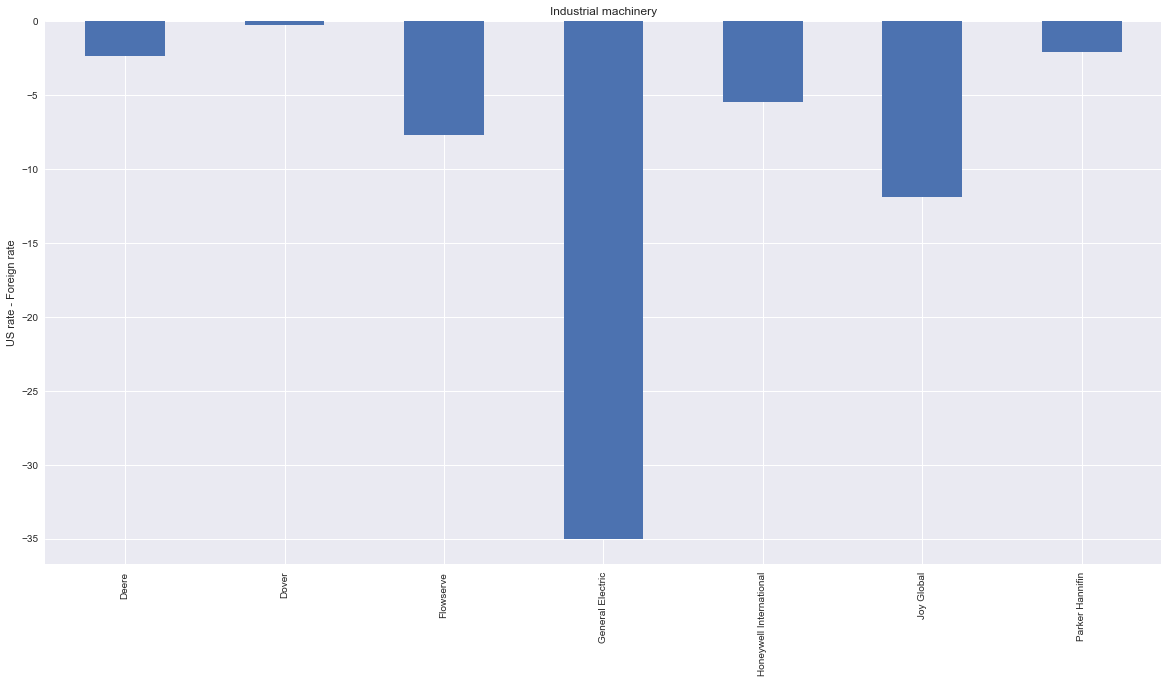

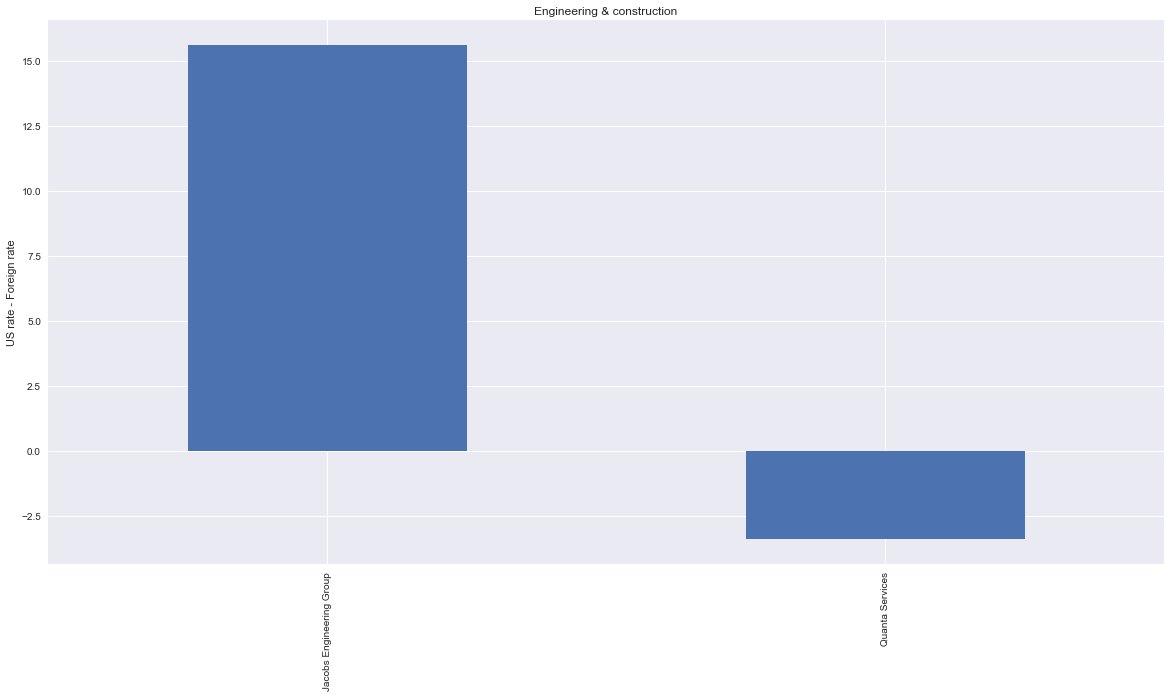

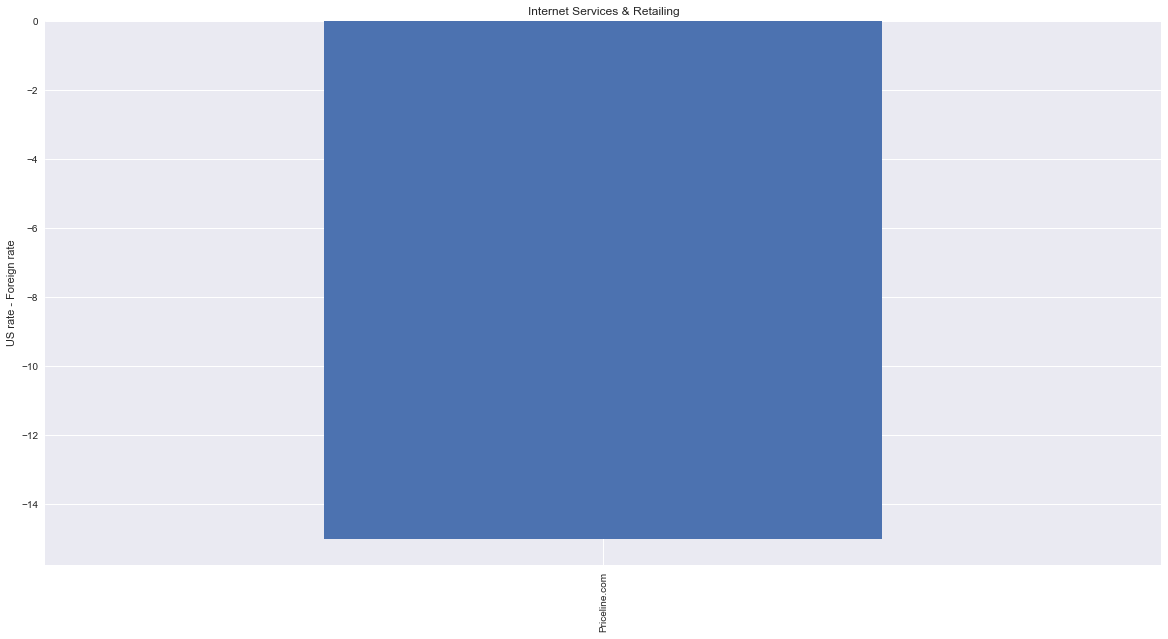

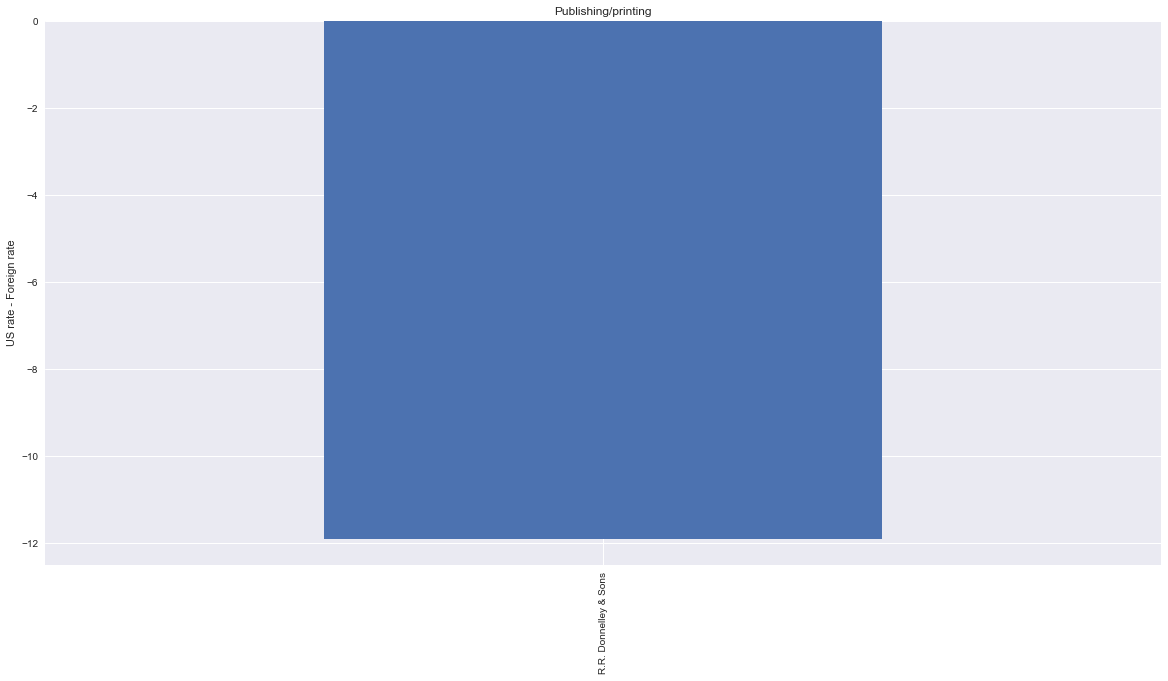

In [33]:
for industry in master_table['Industry'].unique():
    industry_slice = master_table[master_table['Industry'] == industry]
    industry_slice_ftd = industry_slice[pd.notnull(industry_slice['US rate - Foreign rate'])]
    industry_slice_ftd_change = industry_slice_ftd['US rate - Foreign rate']
#     industry_slice_ftd_rate = industry_slice_ftd['Rate (% Eight Year Total)']

    if len(industry_slice_ftd_change):
#         bar_df = pd.DataFrame([industry_slice_ftd_change,industry_slice_ftd_rate]).T
        industry_slice_ftd_change.plot(kind='bar', x='US rate - Foreign rate', title=industry).set_ylabel('US rate - Foreign rate')
        plt.show()

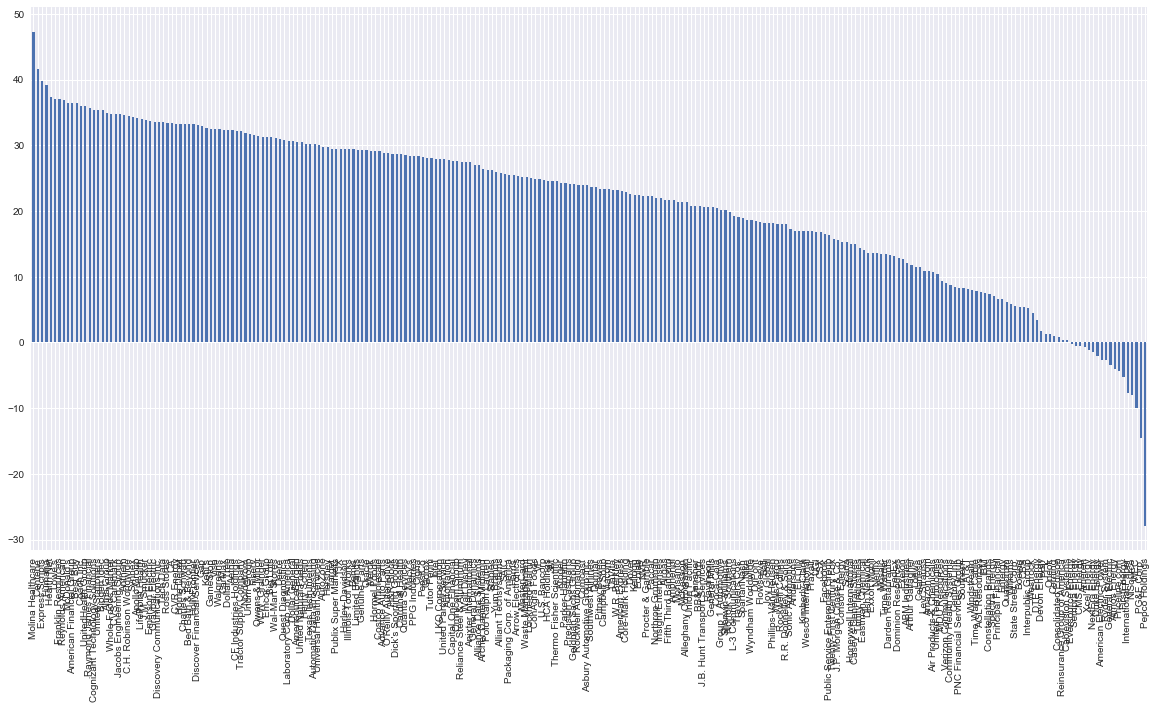

In [34]:
master_table['Rate (% Eight Year Total)'].sort_values()[::-1].plot('bar')

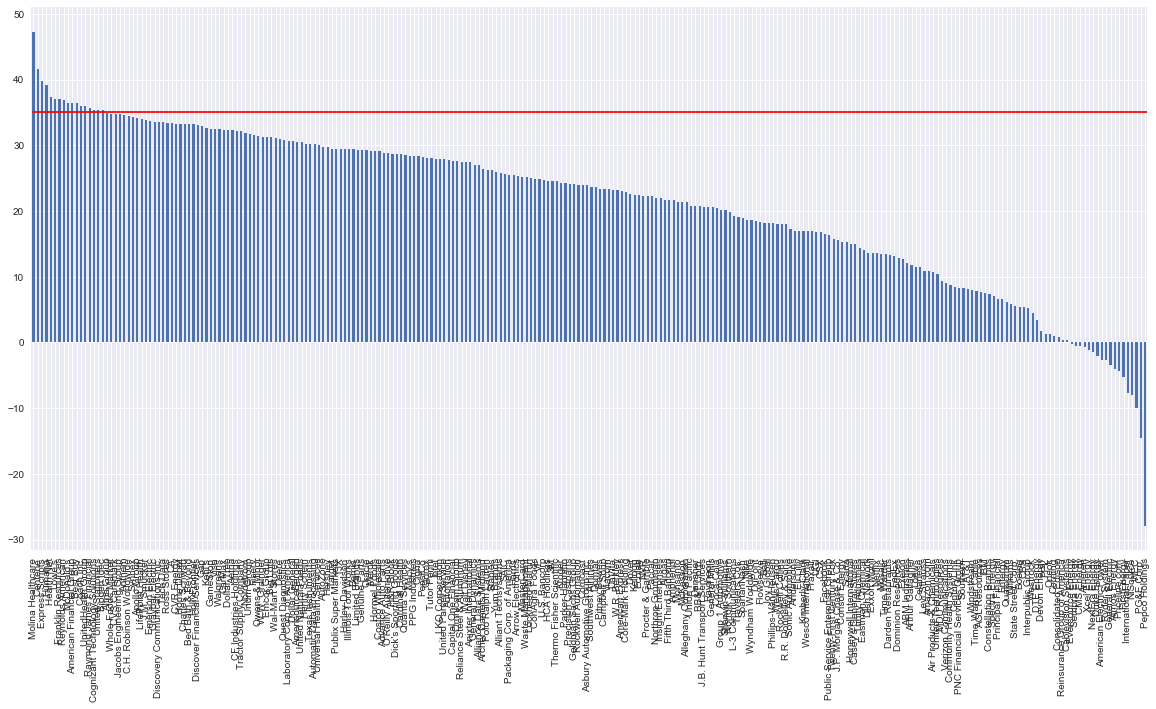

In [35]:
master_table['Rate (% Eight Year Total)'].sort_values(ascending=False).plot('bar')
plt.plot([0,258],[35,35], 'r')
plt.show()

In [36]:
def tax_break(company_name):
    company_row = master_table.loc[company_name]
    return company_row['Profit ($mil Eight Year Total)'] * 0.35 - company_row['Tax ($mil Eight Year Total)']

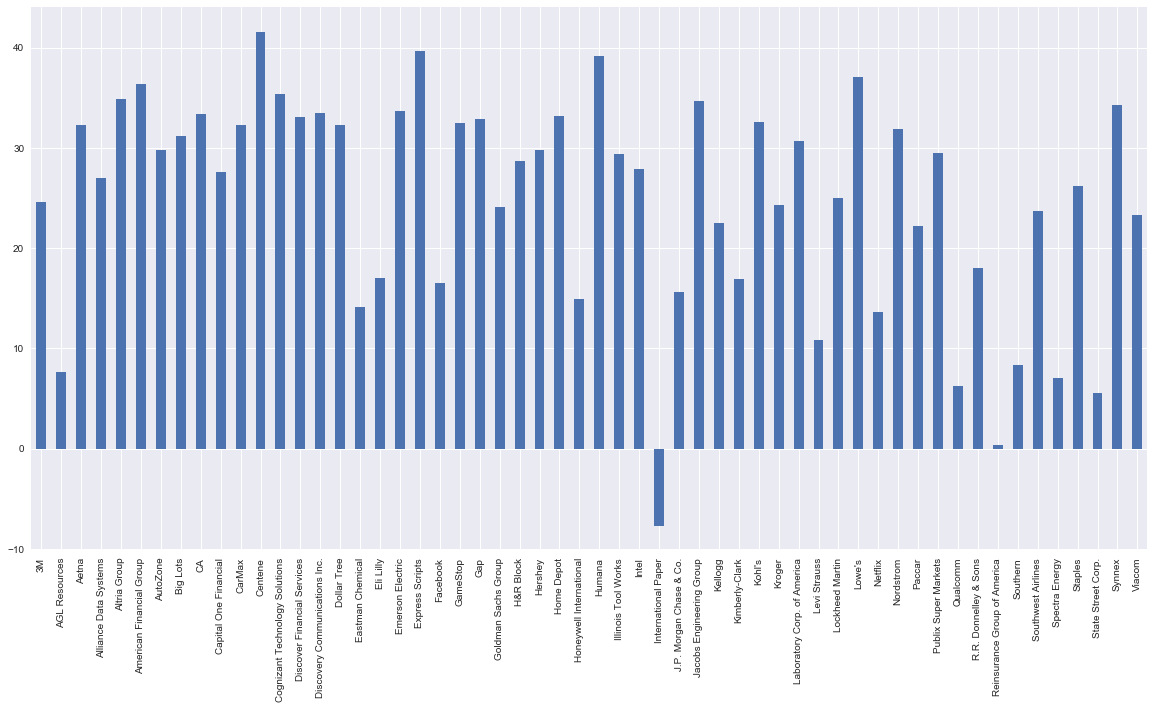

In [37]:
master_table[master_table['Note'].str.contains('deferred', na=False)]['Rate (% Eight Year Total)'].plot('bar')

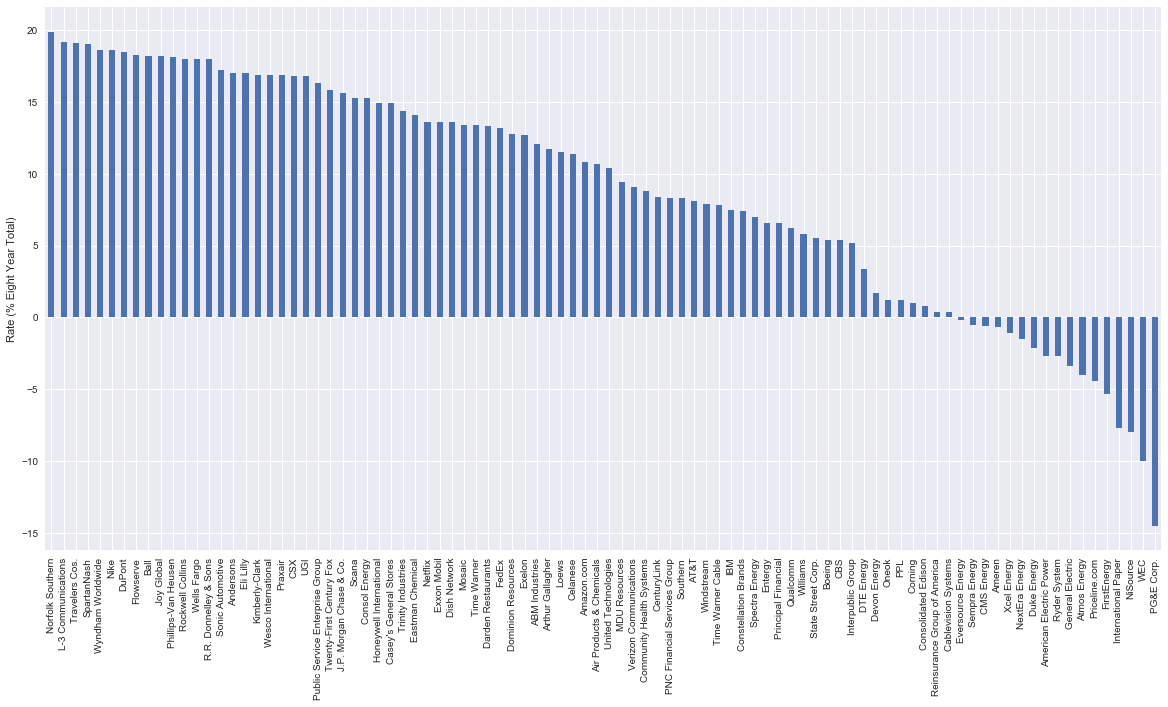

In [38]:
master_table[master_table['CEO compensation ($ 2016)'] > 0].sort_values('Rate (% Eight Year Total)', ascending=False)['Rate (% Eight Year Total)'].plot(kind='bar').set_ylabel('Rate (% Eight Year Total)')

             

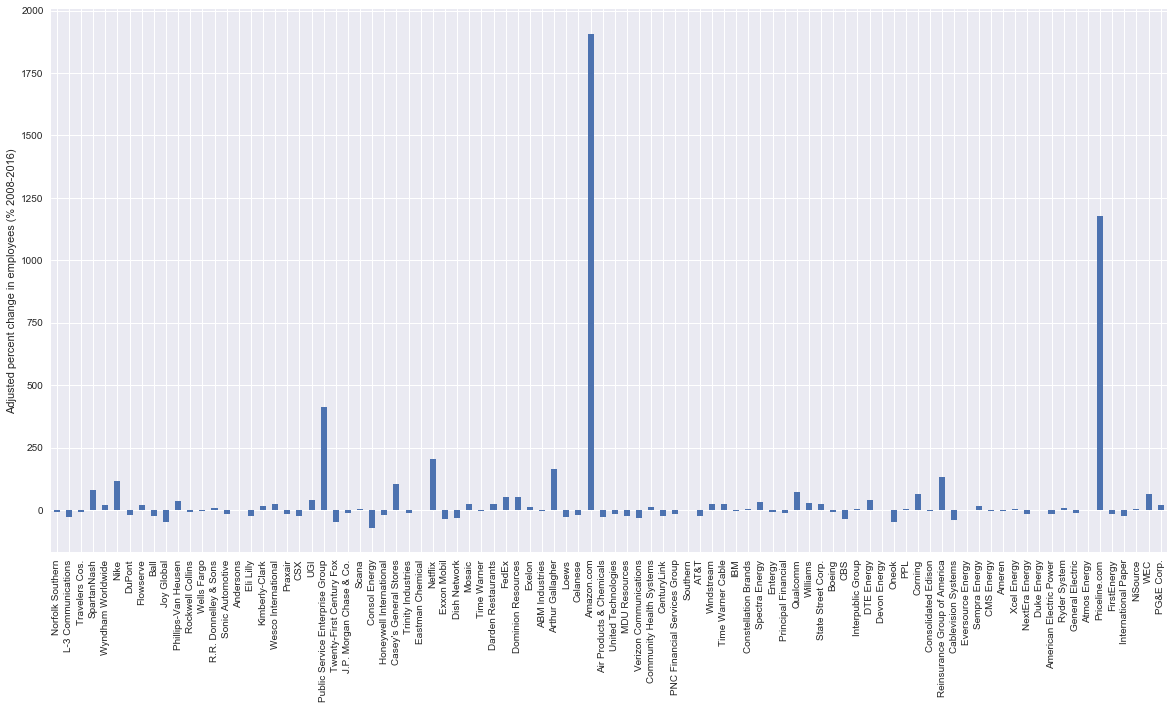

In [39]:
master_table[master_table['CEO compensation ($ 2016)'] > 0].sort_values('Rate (% Eight Year Total)', ascending=False)['Adjusted percent change in employees (% 2008-2016)'].plot(kind='bar').set_ylabel('Adjusted percent change in employees (% 2008-2016)')


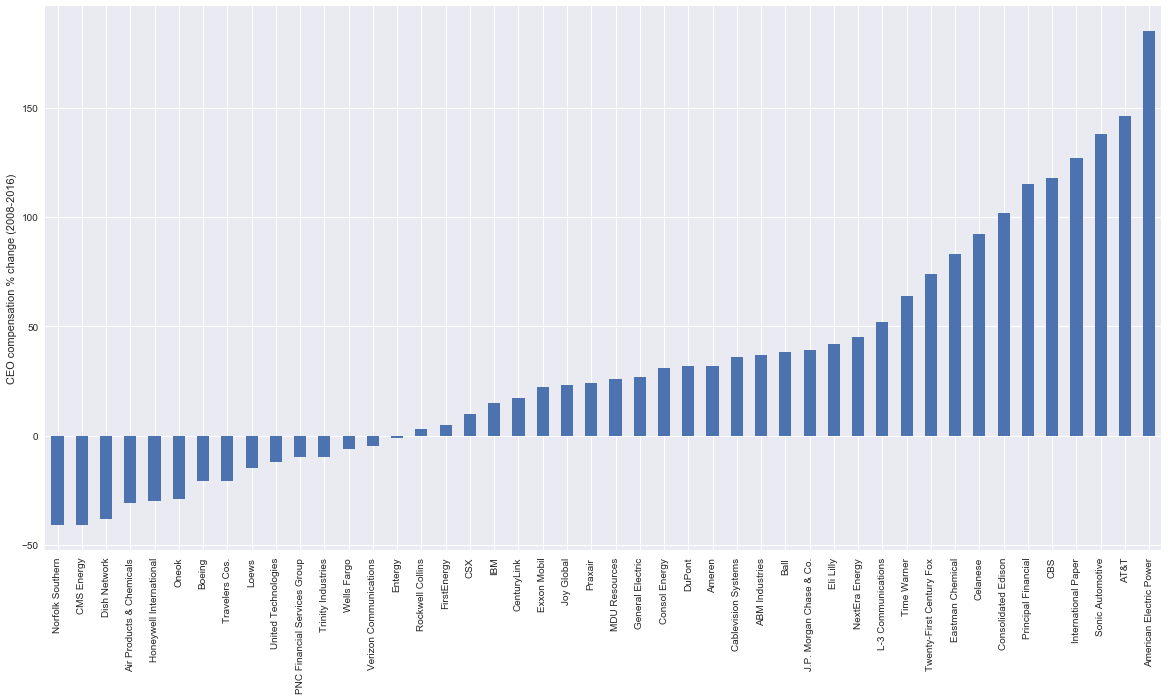

In [40]:
master_table[master_table['Adjusted percent change in employees (% 2008-2016)'] < 0]['CEO compensation % change (2008-2016)'].sort_values().plot(kind='bar').set_ylabel('CEO compensation % change (2008-2016)')

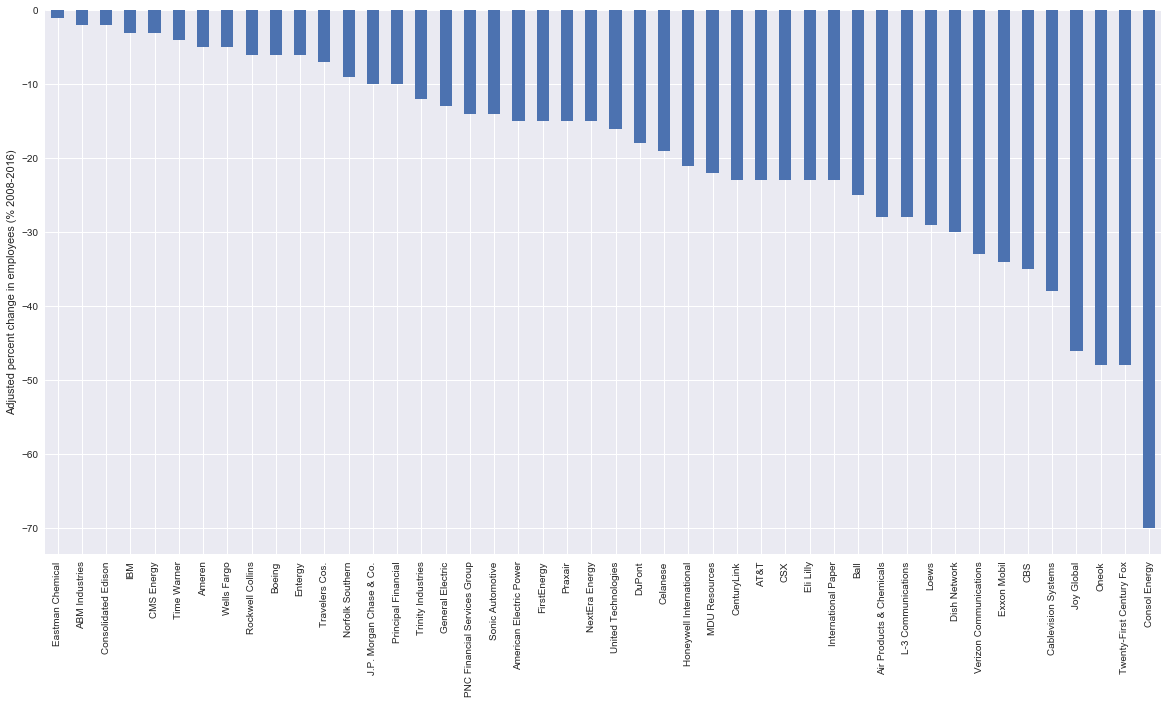

In [41]:
master_table[master_table['Adjusted percent change in employees (% 2008-2016)'] < 0]['Adjusted percent change in employees (% 2008-2016)'].sort_values(ascending=False).plot(kind='bar').set_ylabel('Adjusted percent change in employees (% 2008-2016)')


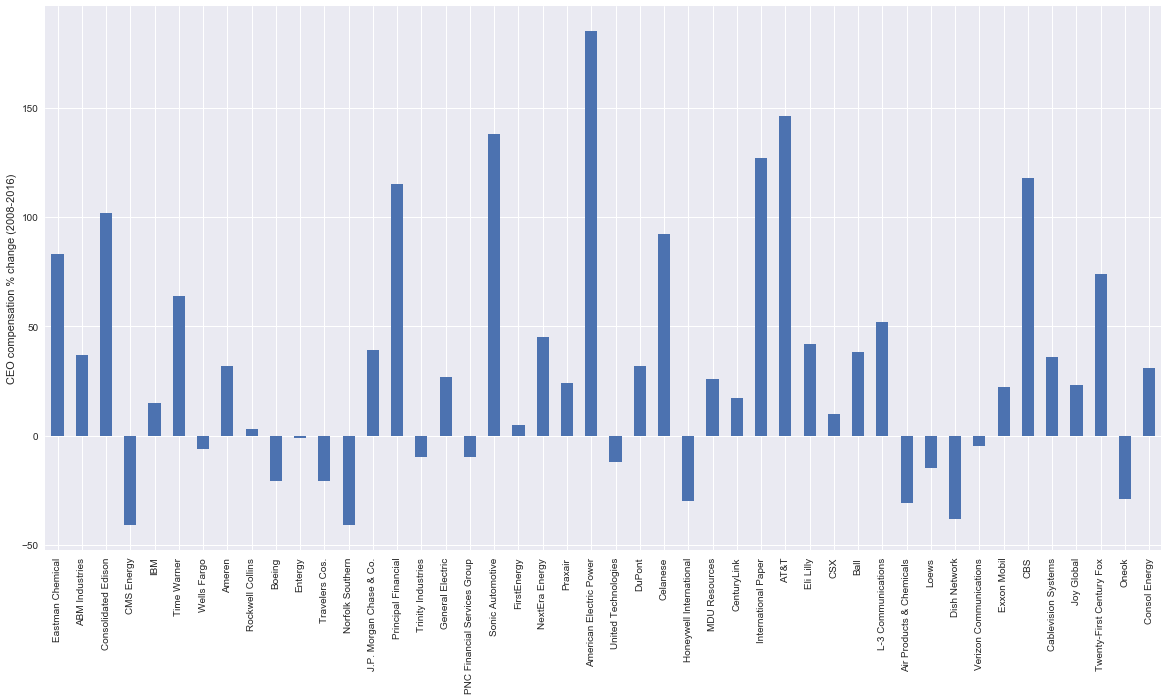

In [42]:
master_table[master_table['Adjusted percent change in employees (% 2008-2016)'] < 0].sort_values('Adjusted percent change in employees (% 2008-2016)', ascending=False)['CEO compensation % change (2008-2016)'].plot(kind='bar').set_ylabel('CEO compensation % change (2008-2016)')



In [43]:
change = master_table.loc['AT&T']['CEO compensation % change (2008-2016)']
current = master_table.loc['AT&T']['CEO compensation ($ 2016)']
current - current/(change * 0.01)


8958568.0547945201

In [44]:
len(itep_foreign)

107

In [45]:
len(master_table[master_table['US rate - Foreign rate'] > 0])

43

In [46]:
tax_breaks = 0
for company in master_table.index:
    tax_breaks += tax_break(company)

In [47]:
tax_breaks * 1e6

526759785000.00012

In [48]:
companies = master_table[master_table['Rate (% Eight Year Total)'] < 35].index

tax_breaks = 0
for company in companies:
    tax_breaks += tax_break(company)

print(tax_breaks * 1e6)

530873875000.0


In [49]:
tax_breaks = []
for company in master_table.index:
    tax_breaks.append(tax_break(company))

In [50]:
master_table['Amt of money saved ($mil 2008-2015)'] = tax_breaks

In [51]:
master_table['Research and experimentation tax credit'] = master_table['Note'].str.contains('Domestic Production Activities Deduction;;k')

In [52]:
master_table['Domestic Production Activities Deduction'] = master_table['Note'].str.contains('Domestic Production Activities Deduction')

In [53]:
master_table.loc['AT&T']

Profit ($mil Eight Year Total)                                                                   141624
Tax ($mil Eight Year Total)                                                                     11500.4
Rate (% Eight Year Total)                                                                           8.1
Profit ($mil 2015)                                                                                18953
Tax ($mil 2015)                                                                                    2496
Rate (% 2015)                                                                                      13.2
Profit ($mil 2014)                                                                              17311.4
Tax ($mil 2014)                                                                                    1609
Rate (% 2014)                                                                                       9.3
Profit ($mil 2013)                                              

In [54]:
'Company Name', 'Industry','Rate (% Eight Year Total)',
        'Amt of money saved ($mil 2008-2015)'
       'Adjusted percent change in employees (% 2008-2016)',
       'CEO compensation % change (2008-2016)',
       'US rate - Foreign rate',
       'Years with zero tax or less', 'Tax Deduction'

IndentationError: unexpected indent (<ipython-input-54-9f48b936d6dd>, line 2)

In [ ]:
master_table['US rate - Foreign rate'].dropna().sort_values(ascending=False).plot(kind='bar').set_ylabel('US rate - Foreign rate')